# import preprocessing

In [1]:
from preprocessing import *

In [ ]:
df = pd.read_parquet('..\프로젝트 data\modeling_data1(완).parquet')
df

SALEDATE PUM_NM KIND_NM  SAN_NM    TOT_AMT  TOT_QTY  year  month  \
0        2016-01-01     사과      후지   충북 충주   26000.00    15.00  2016      1   
1        2016-01-01     사과      후지   충북 충주   20000.00    40.00  2016      1   
2        2016-01-01     사과      후지   충북 충주   10500.00    14.00  2016      1   
3        2016-01-01     사과      후지   충북 충주  210000.00   240.00  2016      1   
4        2016-01-01     사과      후지   충북 충주  175000.00   140.00  2016      1   
...             ...    ...     ...     ...        ...      ...   ...    ...   
18407163 2020-09-28     사과      홍로   충남 서산 1248000.00   240.00  2020      9   
18407164 2020-09-28     사과      홍로   충남 서산 1056000.00   160.00  2020      9   
18407165 2020-09-28     사과      홍로   충남 서산  117000.00    15.00  2020      9   
18407166 2020-09-28     양파  양파(일반)   충남 서산   42000.00    60.00  2020      9   
18407167 2020-09-28      무     기타무  경기도 양평  714000.00   840.00  2020      9   

          day  weekday  ...  온도(최고)  지면온도(최저)  지면온도(평균)  지면온도(최고)  \
0           1        4  ...    5.80     -8.40     -2.40      7.40   
1           1        4  ...    5.80     -8.40     -2.40      7.40   
2           1        4  ...    5.80     -8.40     -2.40      7.40   
3           1        4  ...    5.80     -8.40     -2.40      7.40   
4           1        4  ...    5.80     -8.40     -2.40      7.40   
...       ...      ...  ...     ...       ...       ...       ...   
18407163   28        0  ...   23.30     11.60     20.62     43.70   
18407164   28        0  ...   23.30     11.60     20.62     43.70   
18407165   28        0  ...   23.30     11.60     20.62     43.70   
18407166   28        0  ...   24.30     15.10     24.57     39.70   
18407167   28        0  ...   23.30     17.10     23.10     38.00   

          풍속(m/s)(평균) 습도(%)(평균)  강수량(mm)(합계)  적설량(cm)(합계)  일조량(합계)  일조량(평균)  
0                1.04     68.09         0.00         0.00     7.30     0.32  
1                1.04     68.09         0.00         0.00     7.30     0.32  
2                1.04     68.09         0.00         0.00     7.30     0.32  
3                1.04     68.09         0.00         0.00     7.30     0.32  
4                1.04     68.09         0.00         0.00     7.30     0.32  
...               ...       ...          ...          ...      ...      ...  
18407163         0.43     88.00         0.00         0.00     7.80     0.33  
18407164         0.43     88.00         0.00         0.00     7.80     0.33  
18407165         0.43     88.00         0.00         0.00     7.80     0.33  
18407166         2.72     72.96         0.00         0.00    10.50     0.44  
18407167         2.95     66.79         0.00         0.00     7.50     0.31  

[18407168 rows x 28 columns]

## 가격 이상치 제거

- 무 : 무말랭이, 무말랭이(수입) drop
- 양파 : 샬롯 drop

- 모든 품종 1 ~ 99 % 가격대만 남기고 drop

In [4]:
df['mean_price'] = df['TOT_AMT'] / df['TOT_QTY']
df1 = df.copy()
df2 = df1.copy()

# 사과
low_amount = df2[df2.PUM_NM == '사과'].mean_price.quantile(0.01)
high_amount = df2[df2.PUM_NM == '사과'].mean_price.quantile(0.99)
print((low_amount, high_amount))

apple = df2[df2.PUM_NM == '사과'].loc[(df2[df2.PUM_NM == '사과'].mean_price >= low_amount) & (df2[df2.PUM_NM == '사과'].mean_price <= high_amount)]
apple = apple.reset_index(drop=True)
print(apple.shape)

# 배추
low_amount = df2[df2.PUM_NM == '배추'].mean_price.quantile(0.01)
high_amount = df2[df2.PUM_NM == '배추'].mean_price.quantile(0.99)
print((low_amount, high_amount))

cab = df2[df2.PUM_NM == '배추'].loc[(df2[df2.PUM_NM == '배추'].mean_price >= low_amount) & (df2[df2.PUM_NM == '배추'].mean_price <= high_amount)]
cab = cab.reset_index(drop=True)
print(cab.shape)

# 무
rad = df2[df2.PUM_NM == '무']
rad2 = rad.drop(rad[rad.KIND_NM.str.contains('무말랭이')].index)
rad2 = rad2.drop(rad2[rad.KIND_NM == '갯무'].index) # 거래건수 1개라서 drop
display(rad2.head(2))

low_amount = rad2.mean_price.quantile(0.01)
high_amount = rad2.mean_price.quantile(0.99)
print((low_amount, high_amount))

rad3 = rad2.loc[(rad2.mean_price >= low_amount) & (rad2.mean_price <= high_amount)]
rad3 = rad3.reset_index(drop=True)
print(rad3.shape)

# 양파

oni = df1[df1.PUM_NM == '양파']
oni2 = oni.drop(oni[oni.KIND_NM == '샬롯'].index)
oni2.head(2)

low_amount = oni2.mean_price.quantile(0.01)
high_amount = oni2.mean_price.quantile(0.99)
print((low_amount, high_amount))
oni3 = oni2.loc[(oni2.mean_price >= low_amount) & (oni2.mean_price <= high_amount)]
oni3 = oni3.reset_index(drop=True)
print(oni3.shape)

# 대파
gre = df1[df1.PUM_NM == '대파']

low_amount = gre.mean_price.quantile(0.01)
high_amount = gre.mean_price.quantile(0.99)
print((low_amount, high_amount))

gre2 = gre.loc[(gre.mean_price >= low_amount) & (gre.mean_price <= high_amount)]
gre2 = gre2.reset_index(drop=True)
print(gre2.shape)

# 마늘

gar = df1[df1.PUM_NM == '마늘']

low_amount = gar.mean_price.quantile(0.01)
high_amount = gar.mean_price.quantile(0.99)
print((low_amount, high_amount))

gar2 = gar.loc[(gar.mean_price >= low_amount) & (gar.mean_price <= high_amount)]
gar2 = gar2.reset_index(drop=True)
print(gar2.shape)

# 건고추

red = df1[df1.PUM_NM == '건고추']

low_amount = red.mean_price.quantile(0.01)
high_amount = red.mean_price.quantile(0.99)
print((low_amount, high_amount))

red3 = red.loc[(red.mean_price >= low_amount) & (red.mean_price <= high_amount)]
red3 = red3.reset_index(drop=True)
print(red3.shape)

(300.0, 6760.0)
(9354947, 29)
(100.0, 14000.0)
(1995572, 29)


SALEDATE PUM_NM KIND_NM  SAN_NM  TOT_AMT  TOT_QTY  year  month  day  \
56 2016-01-02      무     달랑무   광주광역시  9000.00    72.00  2016      1    2   
89 2016-01-02      무       무  경기도 양평 16000.00    40.00  2016      1    2   

    weekday  ...  지면온도(최저)  지면온도(평균)  지면온도(최고)  풍속(m/s)(평균)  습도(%)(평균)  \
56        5  ...      6.10     10.13     17.80         2.32      61.29   
89        5  ...      6.10     10.13     17.80         2.32      61.29   

   강수량(mm)(합계)  적설량(cm)(합계)  일조량(합계)  일조량(평균)  mean_price  
56        0.00         0.00     1.90     0.08      125.00  
89        0.00         0.00     1.90     0.08      400.00  

[2 rows x 29 columns]

(80.0, 2252.5)
(1359479, 29)
(125.0, 1848.5066666669522)
(1762055, 29)
(333.3333333333333, 4050.0)
(2070768, 29)
(625.0, 9288.5)
(1472046, 29)
(2000.0, 31666.666666666668)
(40839, 29)


In [5]:
# 데이터프레임 concat

result = pd.concat([apple, cab, rad3, oni3, gre2, gar2, red3], axis = 0)
display(result.head())
display(result.tail())

SALEDATE PUM_NM KIND_NM SAN_NM   TOT_AMT  TOT_QTY  year  month  day  \
0 2016-01-01     사과      후지  충북 충주  26000.00    15.00  2016      1    1   
1 2016-01-01     사과      후지  충북 충주  20000.00    40.00  2016      1    1   
2 2016-01-01     사과      후지  충북 충주  10500.00    14.00  2016      1    1   
3 2016-01-01     사과      후지  충북 충주 210000.00   240.00  2016      1    1   
4 2016-01-01     사과      후지  충북 충주 175000.00   140.00  2016      1    1   

   weekday  ...  지면온도(최저)  지면온도(평균)  지면온도(최고)  풍속(m/s)(평균)  습도(%)(평균)  \
0        4  ...     -8.40     -2.40      7.40         1.04      68.09   
1        4  ...     -8.40     -2.40      7.40         1.04      68.09   
2        4  ...     -8.40     -2.40      7.40         1.04      68.09   
3        4  ...     -8.40     -2.40      7.40         1.04      68.09   
4        4  ...     -8.40     -2.40      7.40         1.04      68.09   

  강수량(mm)(합계)  적설량(cm)(합계)  일조량(합계)  일조량(평균)  mean_price  
0        0.00         0.00     7.30     0.32     1733.33  
1        0.00         0.00     7.30     0.32      500.00  
2        0.00         0.00     7.30     0.32      750.00  
3        0.00         0.00     7.30     0.32      875.00  
4        0.00         0.00     7.30     0.32     1250.00  

[5 rows x 29 columns]

SALEDATE PUM_NM  KIND_NM SAN_NM   TOT_AMT  TOT_QTY  year  month  day  \
40834 2020-09-28    건고추  건고추(일반)  충남 천안 710000.00    30.00  2020      9   28   
40835 2020-09-28    건고추       양건  광주광역시 636000.00    36.00  2020      9   28   
40836 2020-09-28    건고추       양건  전남 무안 937500.00    45.00  2020      9   28   
40837 2020-09-28    건고추  건고추(일반)  전북 장수 225000.00    15.00  2020      9   28   
40838 2020-09-28    건고추  건고추(수입)     중국  50000.00    20.00  2020      9   28   

       weekday  ...  지면온도(최저)  지면온도(평균)  지면온도(최고)  풍속(m/s)(평균)  습도(%)(평균)  \
40834        0  ...     11.10     23.76     49.10         0.65      79.17   
40835        0  ...     11.10     23.76     49.10         0.65      79.17   
40836        0  ...     11.10     23.76     49.10         0.65      79.17   
40837        0  ...     11.10     23.76     49.10         0.65      79.17   
40838        0  ...     11.10     23.76     49.10         0.65      79.17   

      강수량(mm)(합계)  적설량(cm)(합계)  일조량(합계)  일조량(평균)  mean_price  
40834        0.00         0.00     9.00     0.38    23666.67  
40835        0.00         0.00     9.00     0.38    17666.67  
40836        0.00         0.00     9.00     0.38    20833.33  
40837        0.00         0.00     9.00     0.38    15000.00  
40838        0.00         0.00     9.00     0.38     2500.00  

[5 rows x 29 columns]

### 데이터 저장

In [7]:
result.to_parquet( '..\프로젝트 data\my_modeling_data2.parquet', engine="pyarrow", compression='gzip')

## 이상치 제거한 거로 모델링

In [2]:
df = pd.read_parquet('..\프로젝트 data\my_modeling_data2.parquet')
df

SALEDATE PUM_NM  KIND_NM SAN_NM   TOT_AMT  TOT_QTY  year  month  day  \
0     2016-01-01     사과       후지  충북 충주  26000.00    15.00  2016      1    1   
1     2016-01-01     사과       후지  충북 충주  20000.00    40.00  2016      1    1   
2     2016-01-01     사과       후지  충북 충주  10500.00    14.00  2016      1    1   
3     2016-01-01     사과       후지  충북 충주 210000.00   240.00  2016      1    1   
4     2016-01-01     사과       후지  충북 충주 175000.00   140.00  2016      1    1   
...          ...    ...      ...    ...       ...      ...   ...    ...  ...   
40834 2020-09-28    건고추  건고추(일반)  충남 천안 710000.00    30.00  2020      9   28   
40835 2020-09-28    건고추       양건  광주광역시 636000.00    36.00  2020      9   28   
40836 2020-09-28    건고추       양건  전남 무안 937500.00    45.00  2020      9   28   
40837 2020-09-28    건고추  건고추(일반)  전북 장수 225000.00    15.00  2020      9   28   
40838 2020-09-28    건고추  건고추(수입)     중국  50000.00    20.00  2020      9   28   

       weekday  ...  지면온도(최저)  지면온도(평균)  지면온도(최고)  풍속(m/s)(평균)  습도(%)(평균)  \
0            4  ...     -8.40     -2.40      7.40         1.04      68.09   
1            4  ...     -8.40     -2.40      7.40         1.04      68.09   
2            4  ...     -8.40     -2.40      7.40         1.04      68.09   
3            4  ...     -8.40     -2.40      7.40         1.04      68.09   
4            4  ...     -8.40     -2.40      7.40         1.04      68.09   
...        ...  ...       ...       ...       ...          ...        ...   
40834        0  ...     11.10     23.76     49.10         0.65      79.17   
40835        0  ...     11.10     23.76     49.10         0.65      79.17   
40836        0  ...     11.10     23.76     49.10         0.65      79.17   
40837        0  ...     11.10     23.76     49.10         0.65      79.17   
40838        0  ...     11.10     23.76     49.10         0.65      79.17   

      강수량(mm)(합계)  적설량(cm)(합계)  일조량(합계)  일조량(평균)  mean_price  
0            0.00         0.00     7.30     0.32     1733.33  
1            0.00         0.00     7.30     0.32      500.00  
2            0.00         0.00     7.30     0.32      750.00  
3            0.00         0.00     7.30     0.32      875.00  
4            0.00         0.00     7.30     0.32     1250.00  
...           ...          ...      ...      ...         ...  
40834        0.00         0.00     9.00     0.38    23666.67  
40835        0.00         0.00     9.00     0.38    17666.67  
40836        0.00         0.00     9.00     0.38    20833.33  
40837        0.00         0.00     9.00     0.38    15000.00  
40838        0.00         0.00     9.00     0.38     2500.00  

[18055706 rows x 29 columns]

In [9]:
corr_df.columns

Index(['SALEDATE', 'TOT_AMT', 'TOT_QTY', 'mean_price', 'p_lag_1', 'p_lag_2',
       'p_lag_3', 'p_lag_4', 'p_lag_5', 'p_lag_6', 'p_lag_7', 'resid', 'trend',
       'season', 'mean_price_5', 'mean_price_30', 'ratio_mean_price_5_30',
       'std_price_5', 'std_price_30', 'ratio_std_price_5_30', '1week'],
      dtype='object')

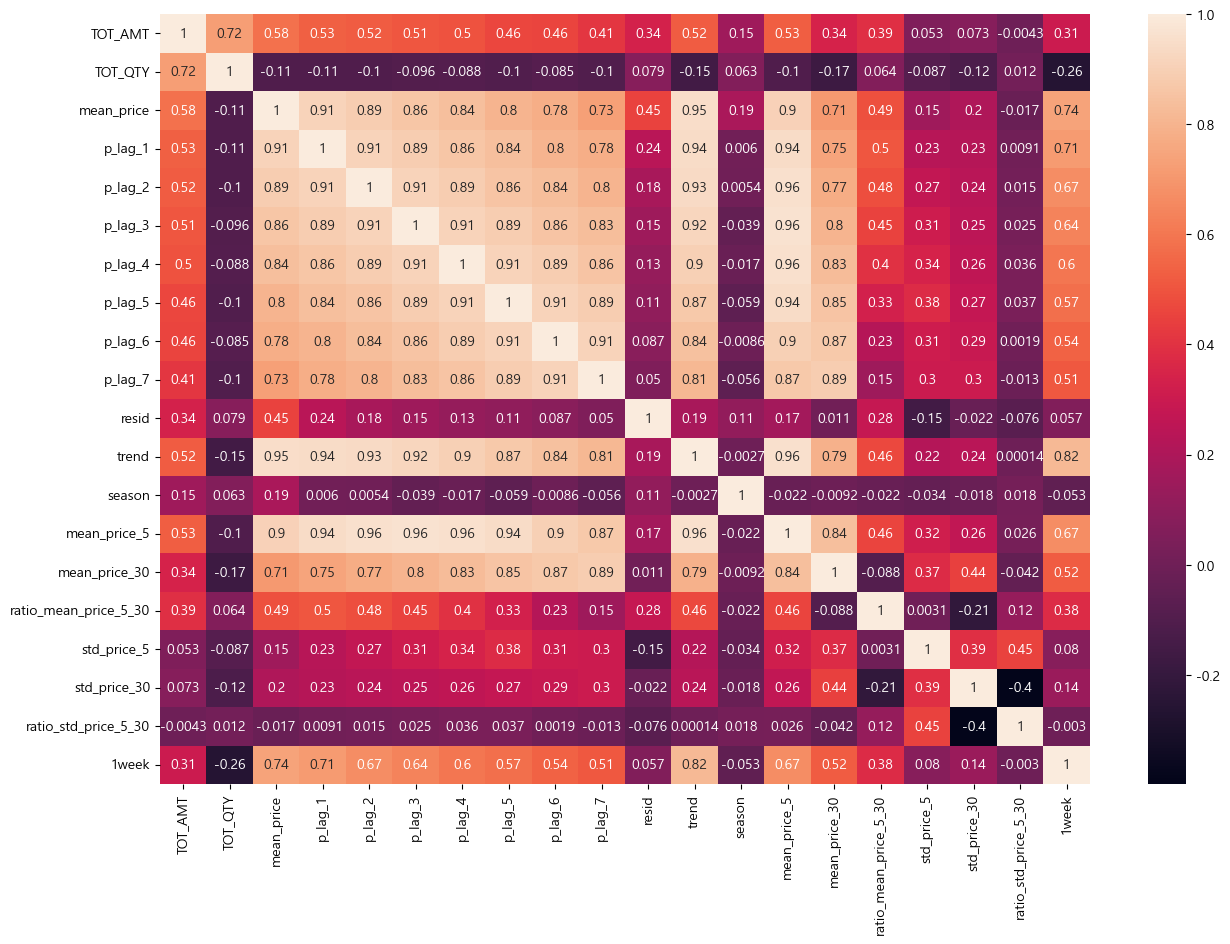

In [8]:
corr_df = select_pum2(df, '사과', 7)

plt.figure(figsize = (15, 10))
sns.heatmap(corr_df.corr(), annot = True)
plt.show()

(1138, 19) (1138,) (314, 19) (314,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 296.15it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.0834
2 FOLDS: LinearRegression MAPE: 0.0545
3 FOLDS: LinearRegression MAPE: 0.0436
4 FOLDS: LinearRegression MAPE: 0.0662
5 FOLDS: LinearRegression MAPE: 0.0579

LinearRegression mean MAPE: 0.0611


(1138, 19) (1138,) (314, 19) (314,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 336.35it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Ridge MAPE: 0.0899
2 FOLDS: Ridge MAPE: 0.0558
3 FOLDS: Ridge MAPE: 0.0438
4 FOLDS: Ridge MAPE: 0.0660
5 FOLDS: Ridge MAPE: 0.0580

Ridge mean MAPE: 0.0627


(1138, 19) (1138,) (314, 19) (314,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 111.30it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Lasso MAPE: 0.0847
2 FOLDS: Lasso MAPE: 0.0560
3 FOLDS: Lasso MAPE: 0.0438
4 FOLDS: Lasso MAPE: 0.0659
5 FOLDS: Lasso MAPE: 0.0583

Lasso mean MAPE: 0.0617


(1138, 19) (1138,) (314, 19) (314,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 323.16it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.1270
2 FOLDS: ElasticNet MAPE: 0.1088
3 FOLDS: ElasticNet MAPE: 0.0631
4 FOLDS: ElasticNet MAPE: 0.1094
5 FOLDS: ElasticNet MAPE: 0.0973

ElasticNet mean MAPE: 0.1011


(1138, 19) (1138,) (314, 19) (314,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 104.78it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.1384
2 FOLDS: DecisionTreeRegressor MAPE: 0.2071
3 FOLDS: DecisionTreeRegressor MAPE: 0.0750
4 FOLDS: DecisionTreeRegressor MAPE: 0.1247
5 FOLDS: DecisionTreeRegressor MAPE: 0.1299

DecisionTreeRegressor mean MAPE: 0.1350


(1138, 19) (1138,) (314, 19) (314,)


RandomForestRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  4.72it/s]

First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.38it/s]

First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:01<00:02,  2.64it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.09it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.05it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1106
2 FOLDS: RandomForestRegressor MAPE: 0.1414
3 FOLDS: RandomForestRegressor MAPE: 0.0542
4 FOLDS: RandomForestRegressor MAPE: 0.1016
5 FOLDS: RandomForestRegressor MAPE: 0.0977

RandomForestRegressor mean MAPE: 0.1011
(1138, 19) (1138,) (314, 19) (314,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 14.80it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00, 11.61it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 11.02it/s]


1 FOLDS: XGBRegressor MAPE: 0.1137
2 FOLDS: XGBRegressor MAPE: 0.1689
3 FOLDS: XGBRegressor MAPE: 0.0647
4 FOLDS: XGBRegressor MAPE: 0.1262
5 FOLDS: XGBRegressor MAPE: 0.1003

XGBRegressor mean MAPE: 0.1148
(1138, 19) (1138,) (314, 19) (314,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 23.51it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 16.43it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LGBMRegressor MAPE: 0.1199
2 FOLDS: LGBMRegressor MAPE: 0.1705
3 FOLDS: LGBMRegressor MAPE: 0.0599
4 FOLDS: LGBMRegressor MAPE: 0.0969
5 FOLDS: LGBMRegressor MAPE: 0.0954

LGBMRegressor mean MAPE: 0.1085


Model  Score
0       LinearRegression   0.06
1                  Ridge   0.06
2                  Lasso   0.06
3             ElasticNet   0.10
4  DecisionTreeRegressor   0.13
5  RandomForestRegressor   0.10
6           XGBRegressor   0.11
7          LGBMRegressor   0.11

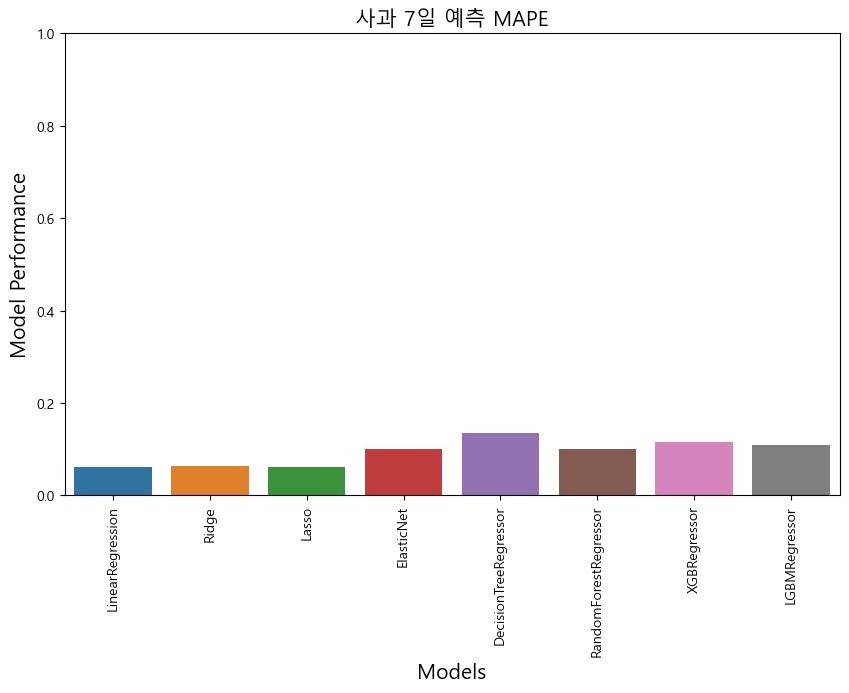

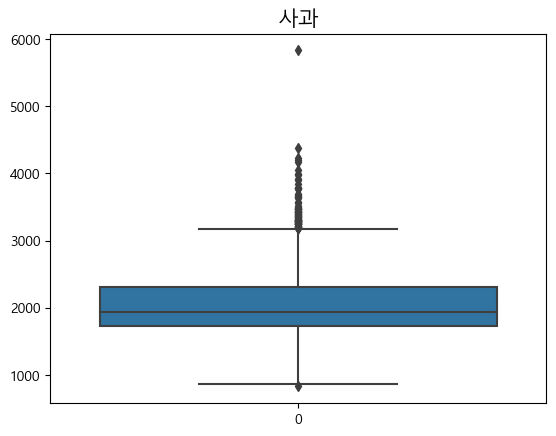

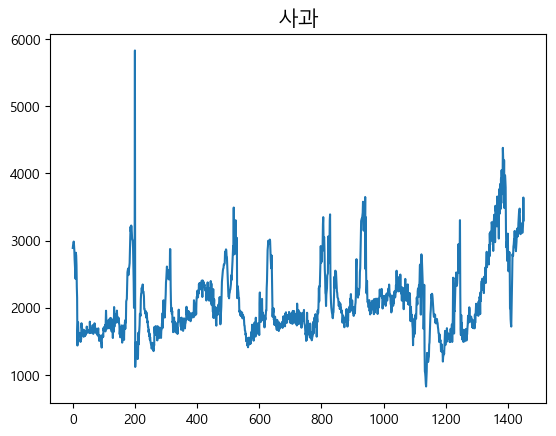

(1138, 19) (1138,) (314, 19) (314,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 293.85it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.1298
2 FOLDS: LinearRegression MAPE: 0.1865
3 FOLDS: LinearRegression MAPE: 0.1184
4 FOLDS: LinearRegression MAPE: 0.1450
5 FOLDS: LinearRegression MAPE: 0.1080

LinearRegression mean MAPE: 0.1375


(1138, 19) (1138,) (314, 19) (314,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 348.02it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Ridge MAPE: 0.1113
2 FOLDS: Ridge MAPE: 0.1890
3 FOLDS: Ridge MAPE: 0.1190
4 FOLDS: Ridge MAPE: 0.1470
5 FOLDS: Ridge MAPE: 0.1096

Ridge mean MAPE: 0.1352


(1138, 19) (1138,) (314, 19) (314,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 135.59it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Lasso MAPE: 0.1052
2 FOLDS: Lasso MAPE: 0.1900
3 FOLDS: Lasso MAPE: 0.1200
4 FOLDS: Lasso MAPE: 0.1499
5 FOLDS: Lasso MAPE: 0.1116

Lasso mean MAPE: 0.1353


(1138, 19) (1138,) (314, 19) (314,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 237.88it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.1344
2 FOLDS: ElasticNet MAPE: 0.2788
3 FOLDS: ElasticNet MAPE: 0.1722
4 FOLDS: ElasticNet MAPE: 0.2250
5 FOLDS: ElasticNet MAPE: 0.2131

ElasticNet mean MAPE: 0.2047


(1138, 19) (1138,) (314, 19) (314,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 94.18it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.2277
2 FOLDS: DecisionTreeRegressor MAPE: 0.4513
3 FOLDS: DecisionTreeRegressor MAPE: 0.2037
4 FOLDS: DecisionTreeRegressor MAPE: 0.1956
5 FOLDS: DecisionTreeRegressor MAPE: 0.1317

DecisionTreeRegressor mean MAPE: 0.2420


(1138, 19) (1138,) (314, 19) (314,)


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  5.34it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.74it/s]

First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.82it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.20it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.13it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1476
2 FOLDS: RandomForestRegressor MAPE: 0.3751
3 FOLDS: RandomForestRegressor MAPE: 0.1448
4 FOLDS: RandomForestRegressor MAPE: 0.1626
5 FOLDS: RandomForestRegressor MAPE: 0.1419

RandomForestRegressor mean MAPE: 0.1944
(1138, 19) (1138,) (314, 19) (314,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 13.41it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00,  9.98it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00,  9.50it/s]


1 FOLDS: XGBRegressor MAPE: 0.1401
2 FOLDS: XGBRegressor MAPE: 0.4126
3 FOLDS: XGBRegressor MAPE: 0.1609
4 FOLDS: XGBRegressor MAPE: 0.1854
5 FOLDS: XGBRegressor MAPE: 0.1453

XGBRegressor mean MAPE: 0.2089
(1138, 19) (1138,) (314, 19) (314,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 24.98it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 16.32it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LGBMRegressor MAPE: 0.1726
2 FOLDS: LGBMRegressor MAPE: 0.3131
3 FOLDS: LGBMRegressor MAPE: 0.1454
4 FOLDS: LGBMRegressor MAPE: 0.1796
5 FOLDS: LGBMRegressor MAPE: 0.1386

LGBMRegressor mean MAPE: 0.1899


Model  Score
0       LinearRegression   0.14
1                  Ridge   0.14
2                  Lasso   0.14
3             ElasticNet   0.20
4  DecisionTreeRegressor   0.24
5  RandomForestRegressor   0.19
6           XGBRegressor   0.21
7          LGBMRegressor   0.19

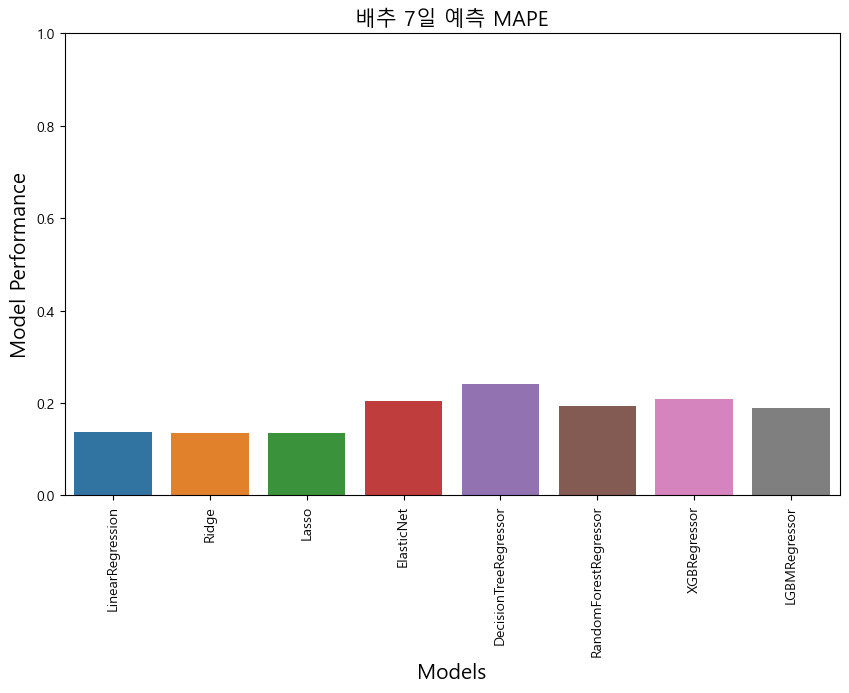

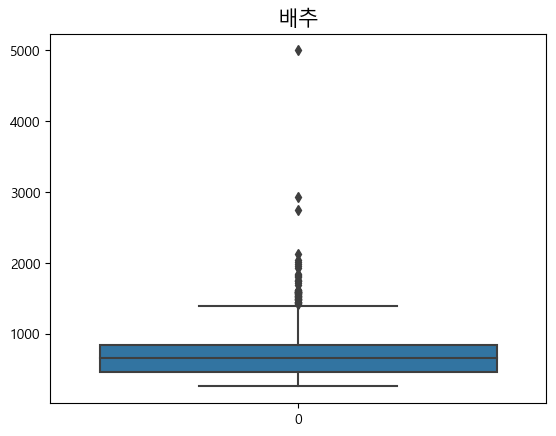

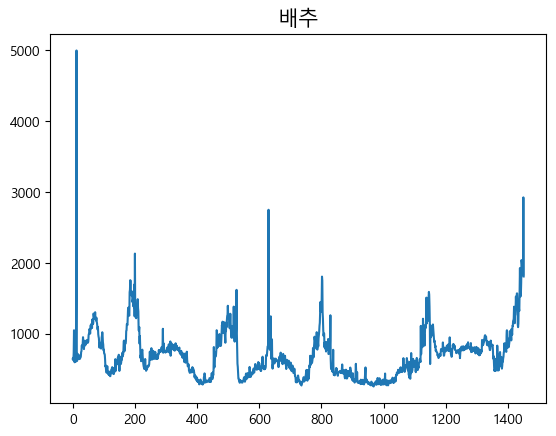

(1138, 19) (1138,) (313, 19) (313,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 312.23it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.0990
2 FOLDS: LinearRegression MAPE: 0.1250
3 FOLDS: LinearRegression MAPE: 0.1237
4 FOLDS: LinearRegression MAPE: 0.1127
5 FOLDS: LinearRegression MAPE: 0.0818

LinearRegression mean MAPE: 0.1084


(1138, 19) (1138,) (313, 19) (313,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 319.74it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Ridge MAPE: 0.0990
2 FOLDS: Ridge MAPE: 0.1300
3 FOLDS: Ridge MAPE: 0.1224
4 FOLDS: Ridge MAPE: 0.1115
5 FOLDS: Ridge MAPE: 0.0826

Ridge mean MAPE: 0.1091


(1138, 19) (1138,) (313, 19) (313,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 120.49it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: Lasso MAPE: 0.0984
2 FOLDS: Lasso MAPE: 0.1279
3 FOLDS: Lasso MAPE: 0.1192
4 FOLDS: Lasso MAPE: 0.1106
5 FOLDS: Lasso MAPE: 0.0849

Lasso mean MAPE: 0.1082


(1138, 19) (1138,) (313, 19) (313,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 312.19it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.1410
2 FOLDS: ElasticNet MAPE: 0.2244
3 FOLDS: ElasticNet MAPE: 0.1739
4 FOLDS: ElasticNet MAPE: 0.2034
5 FOLDS: ElasticNet MAPE: 0.1733

ElasticNet mean MAPE: 0.1832


(1138, 19) (1138,) (313, 19) (313,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 113.72it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.2420
2 FOLDS: DecisionTreeRegressor MAPE: 0.2728
3 FOLDS: DecisionTreeRegressor MAPE: 0.2123
4 FOLDS: DecisionTreeRegressor MAPE: 0.1843
5 FOLDS: DecisionTreeRegressor MAPE: 0.1277

DecisionTreeRegressor mean MAPE: 0.2078


(1138, 19) (1138,) (313, 19) (313,)


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  5.37it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.93it/s]

First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.92it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.30it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.24it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1731
2 FOLDS: RandomForestRegressor MAPE: 0.1997
3 FOLDS: RandomForestRegressor MAPE: 0.1560
4 FOLDS: RandomForestRegressor MAPE: 0.1596
5 FOLDS: RandomForestRegressor MAPE: 0.1193

RandomForestRegressor mean MAPE: 0.1615
(1138, 19) (1138,) (313, 19) (313,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 14.27it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00,  9.71it/s]

First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------
First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00,  9.69it/s]


1 FOLDS: XGBRegressor MAPE: 0.1804
2 FOLDS: XGBRegressor MAPE: 0.1859
3 FOLDS: XGBRegressor MAPE: 0.1561
4 FOLDS: XGBRegressor MAPE: 0.1624
5 FOLDS: XGBRegressor MAPE: 0.1249

XGBRegressor mean MAPE: 0.1619
(1138, 19) (1138,) (313, 19) (313,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 20.25it/s]

First train_day: 0	 Last train_day: 192
First val_day: 193	 Last val_day: 381
----------------------------------------
First train_day: 0	 Last train_day: 381
First val_day: 382	 Last val_day: 570
----------------------------------------
First train_day: 0	 Last train_day: 570
First val_day: 571	 Last val_day: 759
----------------------------------------
First train_day: 0	 Last train_day: 759
First val_day: 760	 Last val_day: 948
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 13.69it/s]

First train_day: 0	 Last train_day: 948
First val_day: 949	 Last val_day: 1137
----------------------------------------
1 FOLDS: LGBMRegressor MAPE: 0.1567
2 FOLDS: LGBMRegressor MAPE: 0.2054
3 FOLDS: LGBMRegressor MAPE: 0.1394
4 FOLDS: LGBMRegressor MAPE: 0.1535
5 FOLDS: LGBMRegressor MAPE: 0.1266

LGBMRegressor mean MAPE: 0.1563


Model  Score
0       LinearRegression   0.11
1                  Ridge   0.11
2                  Lasso   0.11
3             ElasticNet   0.18
4  DecisionTreeRegressor   0.21
5  RandomForestRegressor   0.16
6           XGBRegressor   0.16
7          LGBMRegressor   0.16

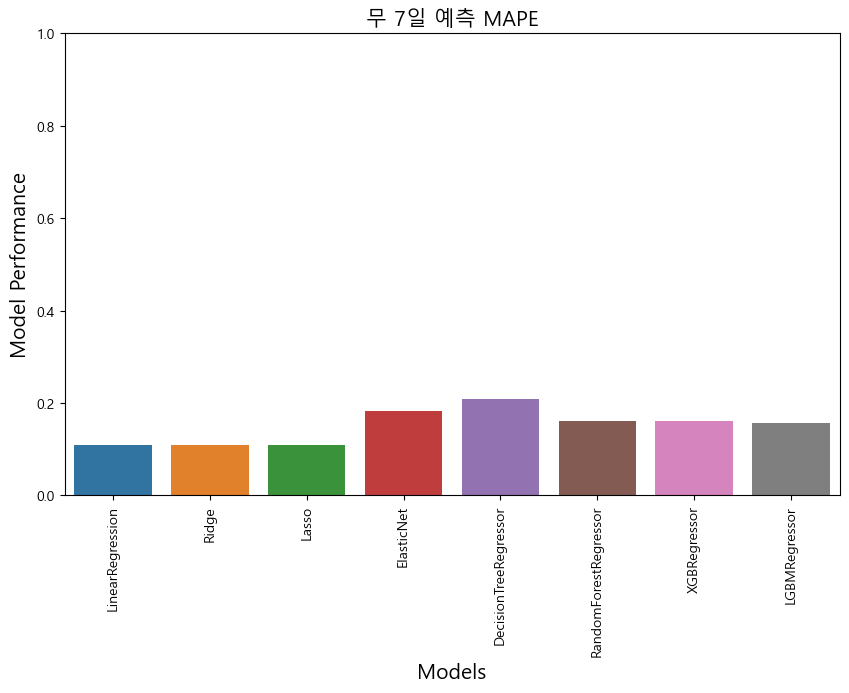

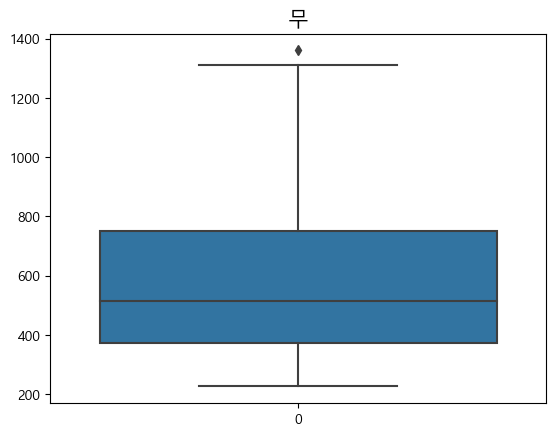

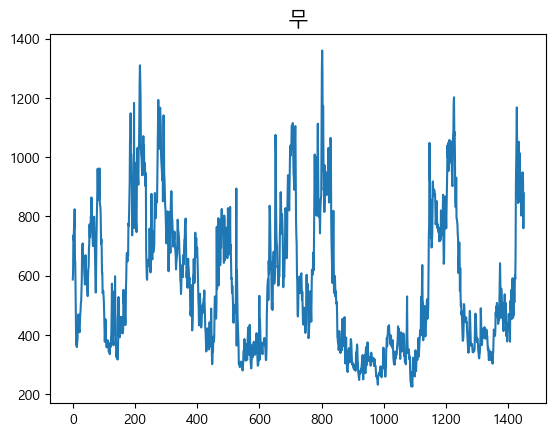

(1134, 19) (1134,) (315, 19) (315,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 257.50it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.0466
2 FOLDS: LinearRegression MAPE: 0.0389
3 FOLDS: LinearRegression MAPE: 0.0483
4 FOLDS: LinearRegression MAPE: 0.0434
5 FOLDS: LinearRegression MAPE: 0.0530

LinearRegression mean MAPE: 0.0460


(1134, 19) (1134,) (315, 19) (315,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 293.86it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: Ridge MAPE: 0.0466
2 FOLDS: Ridge MAPE: 0.0403
3 FOLDS: Ridge MAPE: 0.0504
4 FOLDS: Ridge MAPE: 0.0443
5 FOLDS: Ridge MAPE: 0.0550

Ridge mean MAPE: 0.0473


(1134, 19) (1134,) (315, 19) (315,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 110.85it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: Lasso MAPE: 0.0446
2 FOLDS: Lasso MAPE: 0.0411
3 FOLDS: Lasso MAPE: 0.0547
4 FOLDS: Lasso MAPE: 0.0518
5 FOLDS: Lasso MAPE: 0.0572

Lasso mean MAPE: 0.0499


(1134, 19) (1134,) (315, 19) (315,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 282.17it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.0715
2 FOLDS: ElasticNet MAPE: 0.0839
3 FOLDS: ElasticNet MAPE: 0.1318
4 FOLDS: ElasticNet MAPE: 0.1262
5 FOLDS: ElasticNet MAPE: 0.1389

ElasticNet mean MAPE: 0.1104


(1134, 19) (1134,) (315, 19) (315,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 111.11it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.2217
2 FOLDS: DecisionTreeRegressor MAPE: 0.2112
3 FOLDS: DecisionTreeRegressor MAPE: 0.1606
4 FOLDS: DecisionTreeRegressor MAPE: 0.1131
5 FOLDS: DecisionTreeRegressor MAPE: 0.2126

DecisionTreeRegressor mean MAPE: 0.1838


(1134, 19) (1134,) (315, 19) (315,)


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  5.38it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.91it/s]

First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.88it/s]

First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.27it/s]

First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.21it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1884
2 FOLDS: RandomForestRegressor MAPE: 0.0904
3 FOLDS: RandomForestRegressor MAPE: 0.1210
4 FOLDS: RandomForestRegressor MAPE: 0.0719
5 FOLDS: RandomForestRegressor MAPE: 0.2616

RandomForestRegressor mean MAPE: 0.1467
(1134, 19) (1134,) (315, 19) (315,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 14.27it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00, 10.99it/s]

First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------
First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 10.54it/s]


1 FOLDS: XGBRegressor MAPE: 0.2239
2 FOLDS: XGBRegressor MAPE: 0.1040
3 FOLDS: XGBRegressor MAPE: 0.1151
4 FOLDS: XGBRegressor MAPE: 0.0611
5 FOLDS: XGBRegressor MAPE: 0.2361

XGBRegressor mean MAPE: 0.1480
(1134, 19) (1134,) (315, 19) (315,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 24.77it/s]

First train_day: 0	 Last train_day: 188
First val_day: 189	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 566
----------------------------------------
First train_day: 0	 Last train_day: 566
First val_day: 567	 Last val_day: 755
----------------------------------------
First train_day: 0	 Last train_day: 755
First val_day: 756	 Last val_day: 944
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 17.23it/s]

First train_day: 0	 Last train_day: 944
First val_day: 945	 Last val_day: 1133
----------------------------------------
1 FOLDS: LGBMRegressor MAPE: 0.1890
2 FOLDS: LGBMRegressor MAPE: 0.0806
3 FOLDS: LGBMRegressor MAPE: 0.1130
4 FOLDS: LGBMRegressor MAPE: 0.0704
5 FOLDS: LGBMRegressor MAPE: 0.2268

LGBMRegressor mean MAPE: 0.1359


Model  Score
0       LinearRegression   0.05
1                  Ridge   0.05
2                  Lasso   0.05
3             ElasticNet   0.11
4  DecisionTreeRegressor   0.18
5  RandomForestRegressor   0.15
6           XGBRegressor   0.15
7          LGBMRegressor   0.14

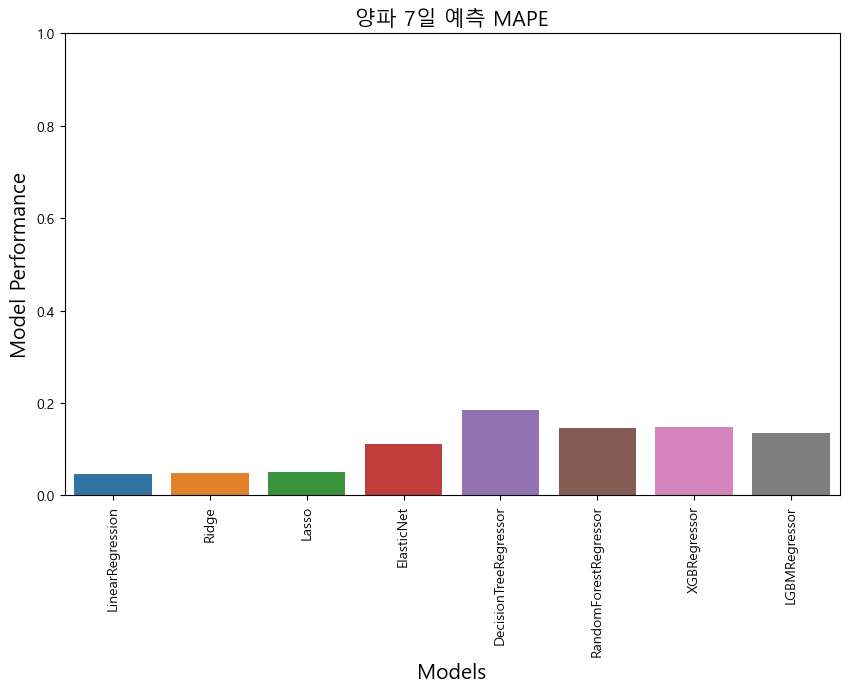

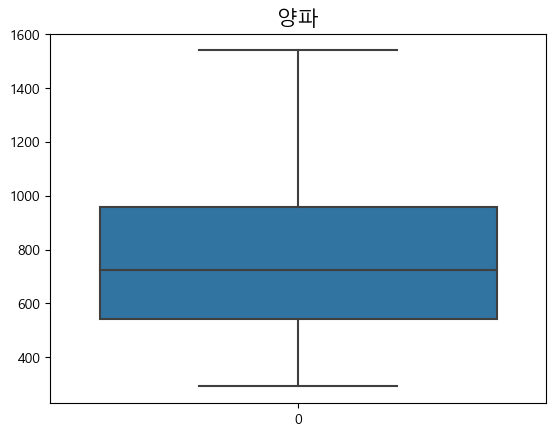

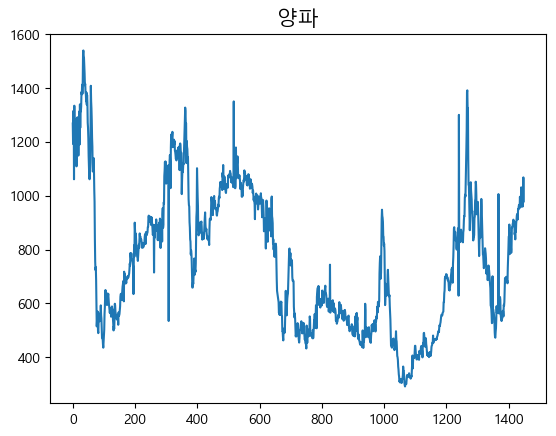

(1137, 19) (1137,) (314, 19) (314,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 265.90it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.0842
2 FOLDS: LinearRegression MAPE: 0.1063
3 FOLDS: LinearRegression MAPE: 0.1186
4 FOLDS: LinearRegression MAPE: 0.0869
5 FOLDS: LinearRegression MAPE: 0.0976

LinearRegression mean MAPE: 0.0987


(1137, 19) (1137,) (314, 19) (314,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 315.71it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------
1 FOLDS: Ridge MAPE: 0.0845
2 FOLDS: Ridge MAPE: 0.1066
3 FOLDS: Ridge MAPE: 0.1186
4 FOLDS: Ridge MAPE: 0.0869
5 FOLDS: Ridge MAPE: 0.0978

Ridge mean MAPE: 0.0989


(1137, 19) (1137,) (314, 19) (314,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 113.26it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------
1 FOLDS: Lasso MAPE: 0.0840
2 FOLDS: Lasso MAPE: 0.1019
3 FOLDS: Lasso MAPE: 0.1177
4 FOLDS: Lasso MAPE: 0.0866
5 FOLDS: Lasso MAPE: 0.0976

Lasso mean MAPE: 0.0975


(1137, 19) (1137,) (314, 19) (314,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 295.11it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.1289
2 FOLDS: ElasticNet MAPE: 0.1501
3 FOLDS: ElasticNet MAPE: 0.1860
4 FOLDS: ElasticNet MAPE: 0.1327
5 FOLDS: ElasticNet MAPE: 0.1512

ElasticNet mean MAPE: 0.1498


(1137, 19) (1137,) (314, 19) (314,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 108.95it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.1767
2 FOLDS: DecisionTreeRegressor MAPE: 0.1627
3 FOLDS: DecisionTreeRegressor MAPE: 0.3061
4 FOLDS: DecisionTreeRegressor MAPE: 0.1825
5 FOLDS: DecisionTreeRegressor MAPE: 0.1317

DecisionTreeRegressor mean MAPE: 0.1919


(1137, 19) (1137,) (314, 19) (314,)


RandomForestRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  4.93it/s]

First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.67it/s]

First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.81it/s]

First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.20it/s]

First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.13it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1307
2 FOLDS: RandomForestRegressor MAPE: 0.1187
3 FOLDS: RandomForestRegressor MAPE: 0.2230
4 FOLDS: RandomForestRegressor MAPE: 0.1071
5 FOLDS: RandomForestRegressor MAPE: 0.1244

RandomForestRegressor mean MAPE: 0.1408
(1137, 19) (1137,) (314, 19) (314,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 14.24it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00, 11.24it/s]

First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 10.69it/s]


1 FOLDS: XGBRegressor MAPE: 0.1451
2 FOLDS: XGBRegressor MAPE: 0.1249
3 FOLDS: XGBRegressor MAPE: 0.2165
4 FOLDS: XGBRegressor MAPE: 0.1242
5 FOLDS: XGBRegressor MAPE: 0.1237

XGBRegressor mean MAPE: 0.1469
(1137, 19) (1137,) (314, 19) (314,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 23.42it/s]

First train_day: 0	 Last train_day: 191
First val_day: 192	 Last val_day: 380
----------------------------------------
First train_day: 0	 Last train_day: 380
First val_day: 381	 Last val_day: 569
----------------------------------------
First train_day: 0	 Last train_day: 569
First val_day: 570	 Last val_day: 758
----------------------------------------
First train_day: 0	 Last train_day: 758
First val_day: 759	 Last val_day: 947
----------------------------------------
First train_day: 0	 Last train_day: 947
First val_day: 948	 Last val_day: 1136
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 16.27it/s]

1 FOLDS: LGBMRegressor MAPE: 0.1484
2 FOLDS: LGBMRegressor MAPE: 0.1340
3 FOLDS: LGBMRegressor MAPE: 0.2213
4 FOLDS: LGBMRegressor MAPE: 0.1125
5 FOLDS: LGBMRegressor MAPE: 0.1217

LGBMRegressor mean MAPE: 0.1476


Model  Score
0       LinearRegression   0.10
1                  Ridge   0.10
2                  Lasso   0.10
3             ElasticNet   0.15
4  DecisionTreeRegressor   0.19
5  RandomForestRegressor   0.14
6           XGBRegressor   0.15
7          LGBMRegressor   0.15

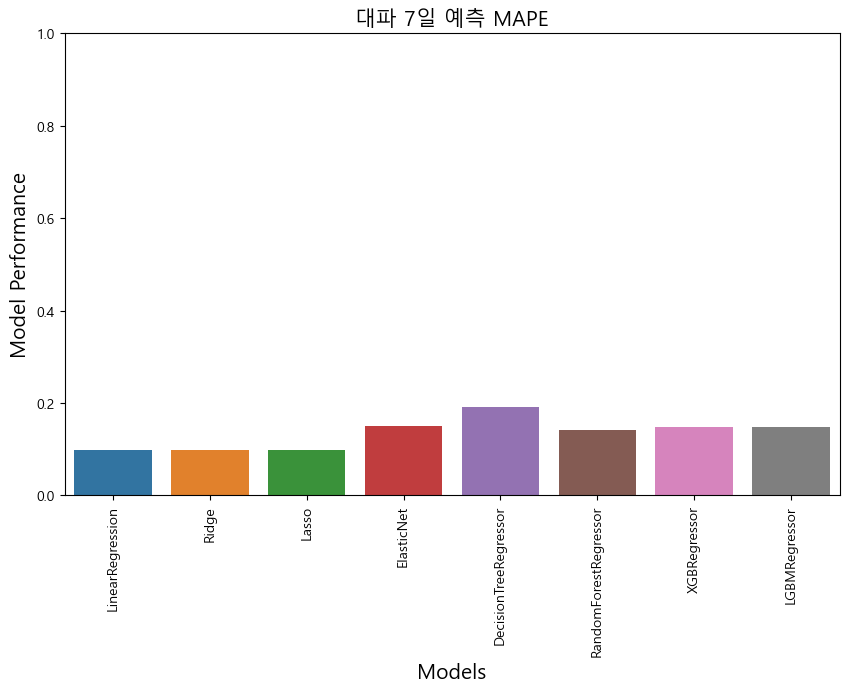

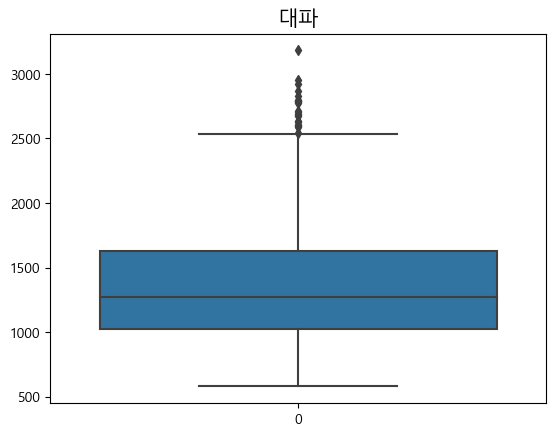

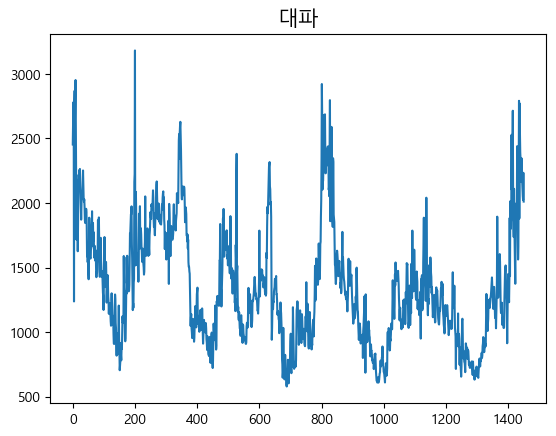

(1130, 19) (1130,) (310, 19) (310,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 277.53it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.0477
2 FOLDS: LinearRegression MAPE: 0.0630
3 FOLDS: LinearRegression MAPE: 0.0504
4 FOLDS: LinearRegression MAPE: 0.0437
5 FOLDS: LinearRegression MAPE: 0.0548

LinearRegression mean MAPE: 0.0519


(1130, 19) (1130,) (310, 19) (310,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 333.03it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: Ridge MAPE: 0.0481
2 FOLDS: Ridge MAPE: 0.0643
3 FOLDS: Ridge MAPE: 0.0511
4 FOLDS: Ridge MAPE: 0.0435
5 FOLDS: Ridge MAPE: 0.0551

Ridge mean MAPE: 0.0524


(1130, 19) (1130,) (310, 19) (310,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 109.42it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: Lasso MAPE: 0.0477
2 FOLDS: Lasso MAPE: 0.0636
3 FOLDS: Lasso MAPE: 0.0513
4 FOLDS: Lasso MAPE: 0.0434
5 FOLDS: Lasso MAPE: 0.0552

Lasso mean MAPE: 0.0523


(1130, 19) (1130,) (310, 19) (310,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 315.57it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.0594
2 FOLDS: ElasticNet MAPE: 0.0942
3 FOLDS: ElasticNet MAPE: 0.0850
4 FOLDS: ElasticNet MAPE: 0.0495
5 FOLDS: ElasticNet MAPE: 0.1150

ElasticNet mean MAPE: 0.0806


(1130, 19) (1130,) (310, 19) (310,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 105.30it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.0773
2 FOLDS: DecisionTreeRegressor MAPE: 0.1721
3 FOLDS: DecisionTreeRegressor MAPE: 0.0940
4 FOLDS: DecisionTreeRegressor MAPE: 0.0990
5 FOLDS: DecisionTreeRegressor MAPE: 0.1781

DecisionTreeRegressor mean MAPE: 0.1241


(1130, 19) (1130,) (310, 19) (310,)


RandomForestRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  5.16it/s]

First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.75it/s]

First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:02,  2.81it/s]

First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:02,  2.21it/s]

First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  2.13it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.0569
2 FOLDS: RandomForestRegressor MAPE: 0.1244
3 FOLDS: RandomForestRegressor MAPE: 0.0610
4 FOLDS: RandomForestRegressor MAPE: 0.0489
5 FOLDS: RandomForestRegressor MAPE: 0.1652

RandomForestRegressor mean MAPE: 0.0913
(1130, 19) (1130,) (310, 19) (310,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 14.07it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00, 11.16it/s]

First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------
First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 10.65it/s]


1 FOLDS: XGBRegressor MAPE: 0.0646
2 FOLDS: XGBRegressor MAPE: 0.1230
3 FOLDS: XGBRegressor MAPE: 0.0662
4 FOLDS: XGBRegressor MAPE: 0.0552
5 FOLDS: XGBRegressor MAPE: 0.1872

XGBRegressor mean MAPE: 0.0992
(1130, 19) (1130,) (310, 19) (310,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 23.97it/s]

First train_day: 0	 Last train_day: 189
First val_day: 190	 Last val_day: 377
----------------------------------------
First train_day: 0	 Last train_day: 377
First val_day: 378	 Last val_day: 565
----------------------------------------
First train_day: 0	 Last train_day: 565
First val_day: 566	 Last val_day: 753
----------------------------------------
First train_day: 0	 Last train_day: 753
First val_day: 754	 Last val_day: 941
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 17.28it/s]

First train_day: 0	 Last train_day: 941
First val_day: 942	 Last val_day: 1129
----------------------------------------
1 FOLDS: LGBMRegressor MAPE: 0.0634
2 FOLDS: LGBMRegressor MAPE: 0.1164
3 FOLDS: LGBMRegressor MAPE: 0.0695
4 FOLDS: LGBMRegressor MAPE: 0.0536
5 FOLDS: LGBMRegressor MAPE: 0.1821

LGBMRegressor mean MAPE: 0.0970


Model  Score
0       LinearRegression   0.05
1                  Ridge   0.05
2                  Lasso   0.05
3             ElasticNet   0.08
4  DecisionTreeRegressor   0.12
5  RandomForestRegressor   0.09
6           XGBRegressor   0.10
7          LGBMRegressor   0.10

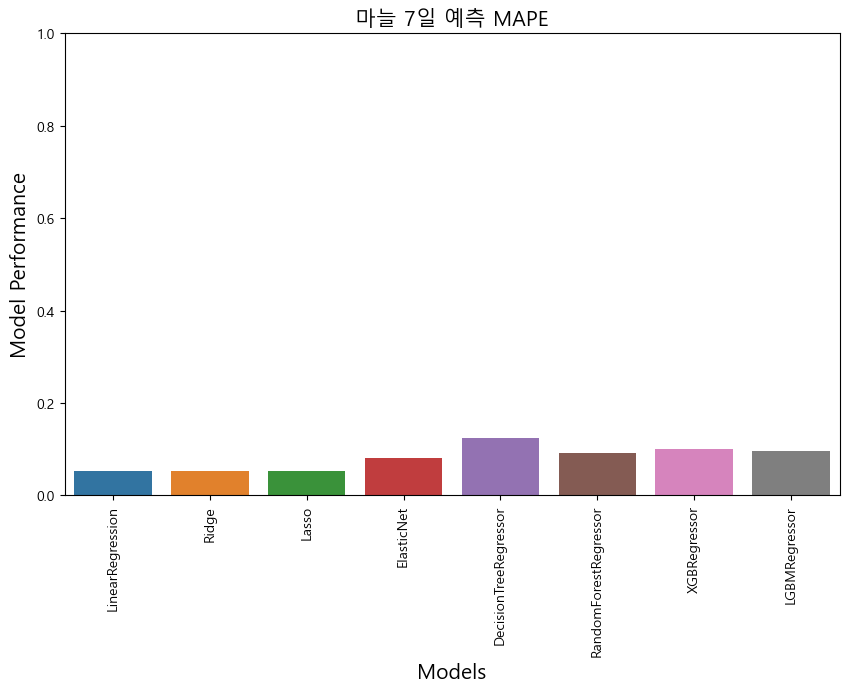

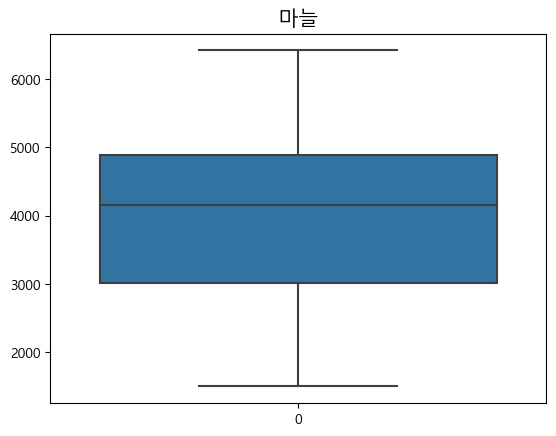

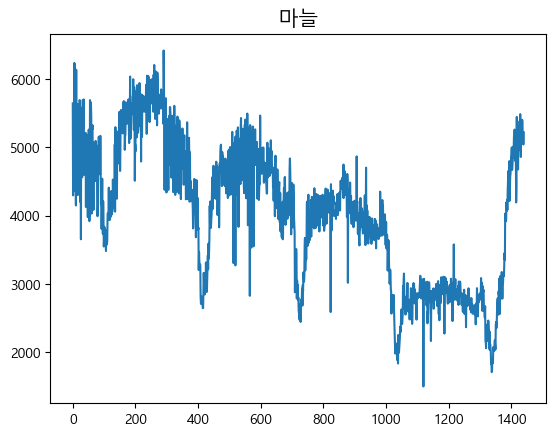

(1121, 19) (1121,) (309, 19) (309,)


LinearRegression Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 293.87it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------
1 FOLDS: LinearRegression MAPE: 0.1440
2 FOLDS: LinearRegression MAPE: 0.1788
3 FOLDS: LinearRegression MAPE: 0.3590
4 FOLDS: LinearRegression MAPE: 0.1663
5 FOLDS: LinearRegression MAPE: 0.1928

LinearRegression mean MAPE: 0.2082


(1121, 19) (1121,) (309, 19) (309,)


Ridge Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 262.92it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------
1 FOLDS: Ridge MAPE: 0.1459
2 FOLDS: Ridge MAPE: 0.1810
3 FOLDS: Ridge MAPE: 0.3591
4 FOLDS: Ridge MAPE: 0.1666
5 FOLDS: Ridge MAPE: 0.1926

Ridge mean MAPE: 0.2091


(1121, 19) (1121,) (309, 19) (309,)


Lasso Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 90.83it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------
1 FOLDS: Lasso MAPE: 0.1460
2 FOLDS: Lasso MAPE: 0.1763
3 FOLDS: Lasso MAPE: 0.3584
4 FOLDS: Lasso MAPE: 0.1664
5 FOLDS: Lasso MAPE: 0.1928

Lasso mean MAPE: 0.2080


(1121, 19) (1121,) (309, 19) (309,)


ElasticNet Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 305.77it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------
1 FOLDS: ElasticNet MAPE: 0.1435
2 FOLDS: ElasticNet MAPE: 0.3068
3 FOLDS: ElasticNet MAPE: 0.3727
4 FOLDS: ElasticNet MAPE: 0.1800
5 FOLDS: ElasticNet MAPE: 0.1975

ElasticNet mean MAPE: 0.2401


(1121, 19) (1121,) (309, 19) (309,)


DecisionTreeRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 90.76it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------
1 FOLDS: DecisionTreeRegressor MAPE: 0.2381
2 FOLDS: DecisionTreeRegressor MAPE: 0.4252
3 FOLDS: DecisionTreeRegressor MAPE: 0.5802
4 FOLDS: DecisionTreeRegressor MAPE: 0.2992
5 FOLDS: DecisionTreeRegressor MAPE: 0.2722

DecisionTreeRegressor mean MAPE: 0.3630


(1121, 19) (1121,) (309, 19) (309,)


RandomForestRegressor Cross Validations...:  10%|█         | 1/10 [00:00<00:01,  4.83it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------


RandomForestRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:02,  3.38it/s]

First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------


RandomForestRegressor Cross Validations...:  30%|███       | 3/10 [00:01<00:02,  2.47it/s]

First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------


RandomForestRegressor Cross Validations...:  40%|████      | 4/10 [00:01<00:03,  1.99it/s]

First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------


RandomForestRegressor Cross Validations...:  50%|█████     | 5/10 [00:02<00:02,  1.91it/s]


1 FOLDS: RandomForestRegressor MAPE: 0.1504
2 FOLDS: RandomForestRegressor MAPE: 0.2882
3 FOLDS: RandomForestRegressor MAPE: 0.6048
4 FOLDS: RandomForestRegressor MAPE: 0.1981
5 FOLDS: RandomForestRegressor MAPE: 0.2148

RandomForestRegressor mean MAPE: 0.2913
(1121, 19) (1121,) (309, 19) (309,)


XGBRegressor Cross Validations...:  20%|██        | 2/10 [00:00<00:00, 13.73it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------


XGBRegressor Cross Validations...:  40%|████      | 4/10 [00:00<00:00,  9.82it/s]

First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------


XGBRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00,  9.63it/s]


1 FOLDS: XGBRegressor MAPE: 0.1696
2 FOLDS: XGBRegressor MAPE: 0.3289
3 FOLDS: XGBRegressor MAPE: 0.5071
4 FOLDS: XGBRegressor MAPE: 0.2395
5 FOLDS: XGBRegressor MAPE: 0.2457

XGBRegressor mean MAPE: 0.2982
(1121, 19) (1121,) (309, 19) (309,)


LGBMRegressor Cross Validations...:  30%|███       | 3/10 [00:00<00:00, 24.77it/s]

First train_day: 0	 Last train_day: 190
First val_day: 191	 Last val_day: 376
----------------------------------------
First train_day: 0	 Last train_day: 376
First val_day: 377	 Last val_day: 562
----------------------------------------
First train_day: 0	 Last train_day: 562
First val_day: 563	 Last val_day: 748
----------------------------------------
First train_day: 0	 Last train_day: 748
First val_day: 749	 Last val_day: 934
----------------------------------------
First train_day: 0	 Last train_day: 934
First val_day: 935	 Last val_day: 1120
----------------------------------------


LGBMRegressor Cross Validations...:  50%|█████     | 5/10 [00:00<00:00, 16.82it/s]

1 FOLDS: LGBMRegressor MAPE: 0.1500
2 FOLDS: LGBMRegressor MAPE: 0.3493
3 FOLDS: LGBMRegressor MAPE: 0.4955
4 FOLDS: LGBMRegressor MAPE: 0.2180
5 FOLDS: LGBMRegressor MAPE: 0.2247

LGBMRegressor mean MAPE: 0.2875


Model  Score
0       LinearRegression   0.21
1                  Ridge   0.21
2                  Lasso   0.21
3             ElasticNet   0.24
4  DecisionTreeRegressor   0.36
5  RandomForestRegressor   0.29
6           XGBRegressor   0.30
7          LGBMRegressor   0.29

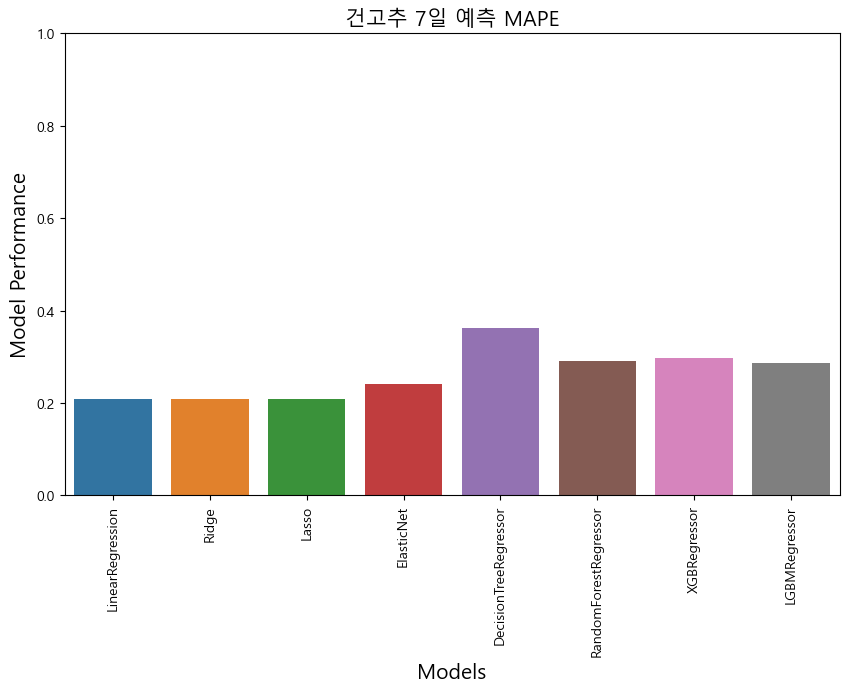

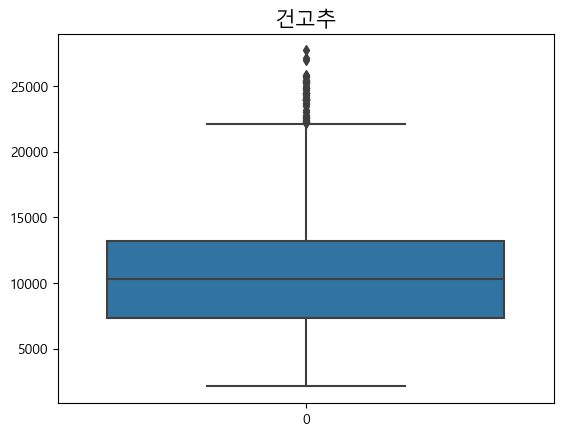

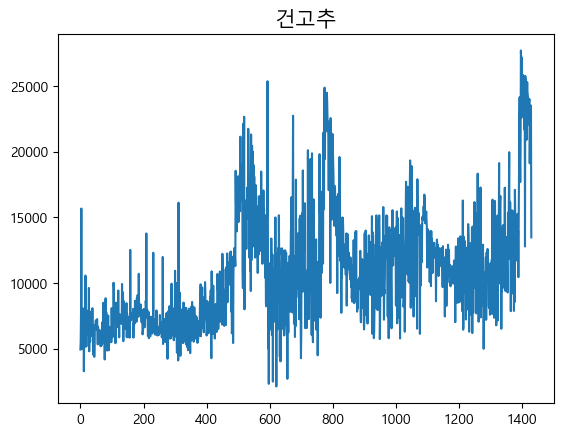

In [4]:
pum_lst = df.PUM_NM.unique()

for pum in pum_lst :
    modeling2(df, pum, 7)

    df_pum = select_pum2(df, pum, 7)
    # boxplot 확인
    sns.boxplot(df_pum['mean_price'])
    plt.title(f'{pum}', fontsize = 15)
    plt.show()

    # lineplot 확인
    df_pum['mean_price'].plot()
    plt.title(f'{pum}', fontsize = 15)
    plt.show()

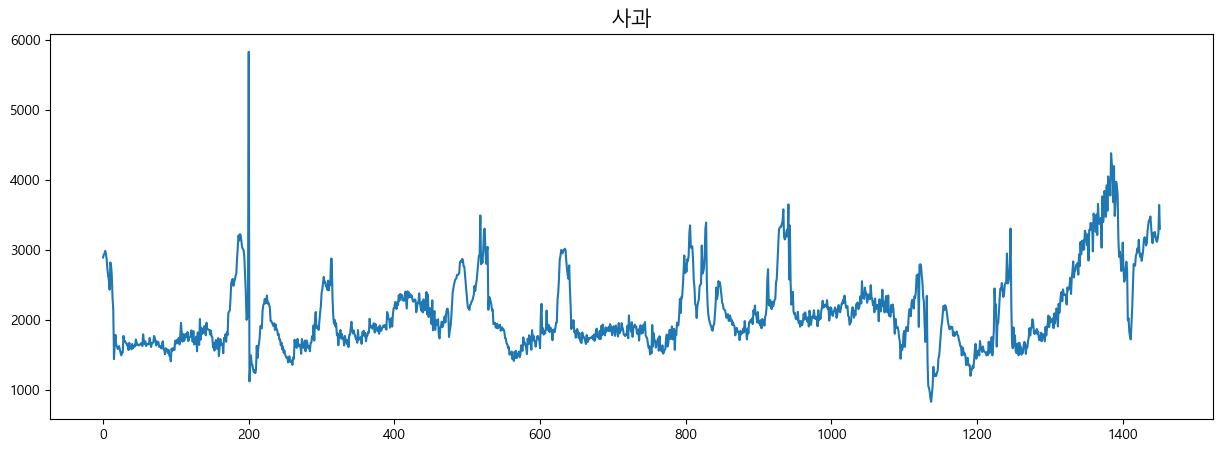

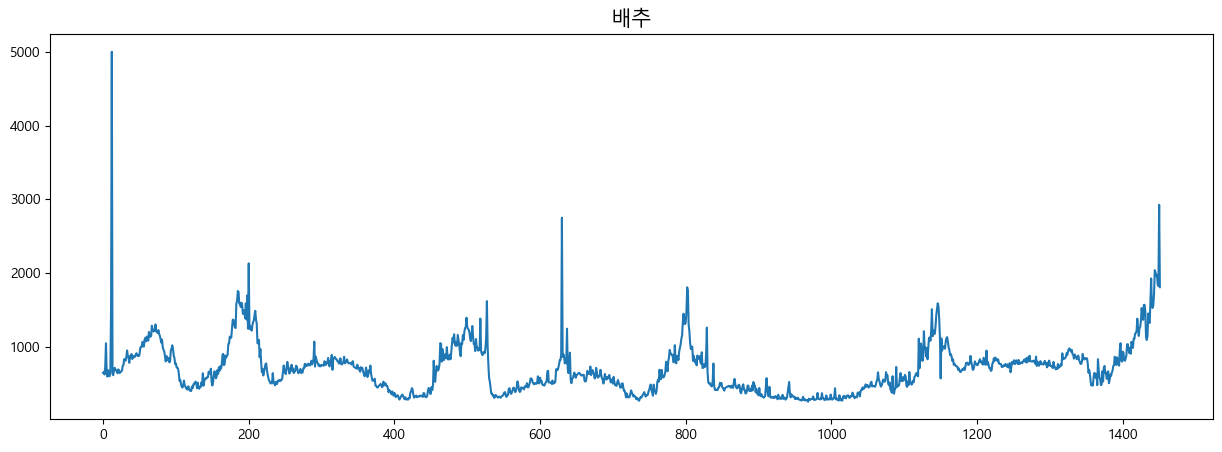

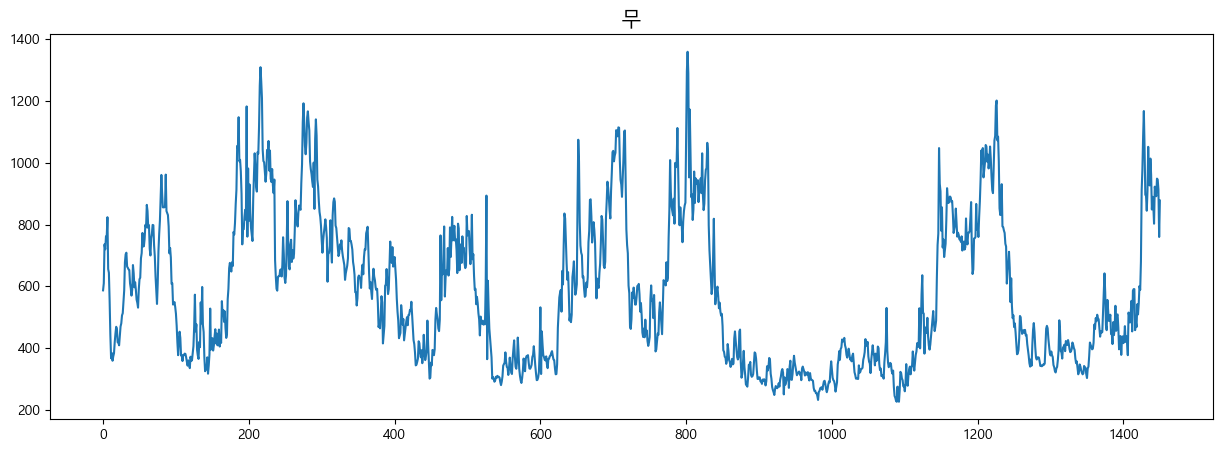

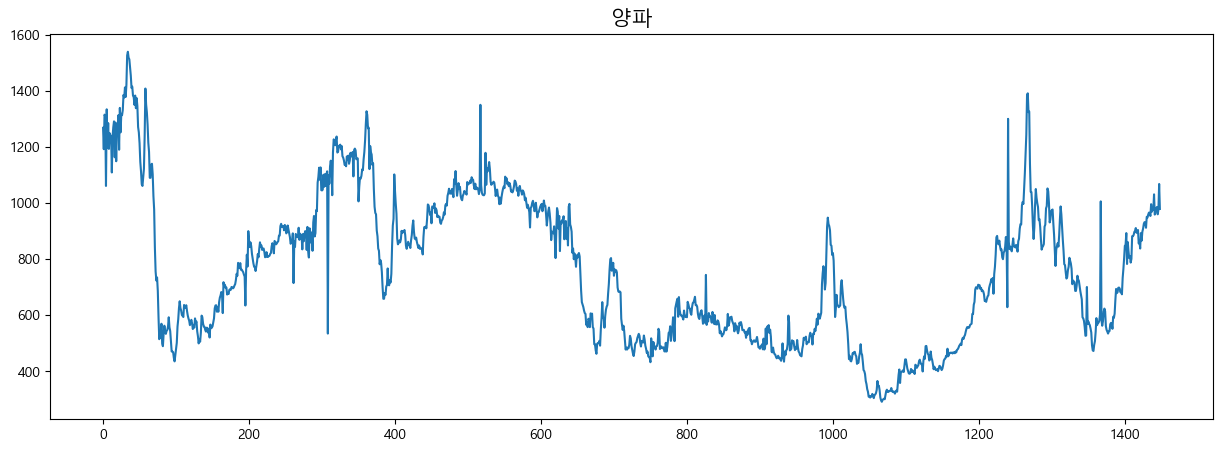

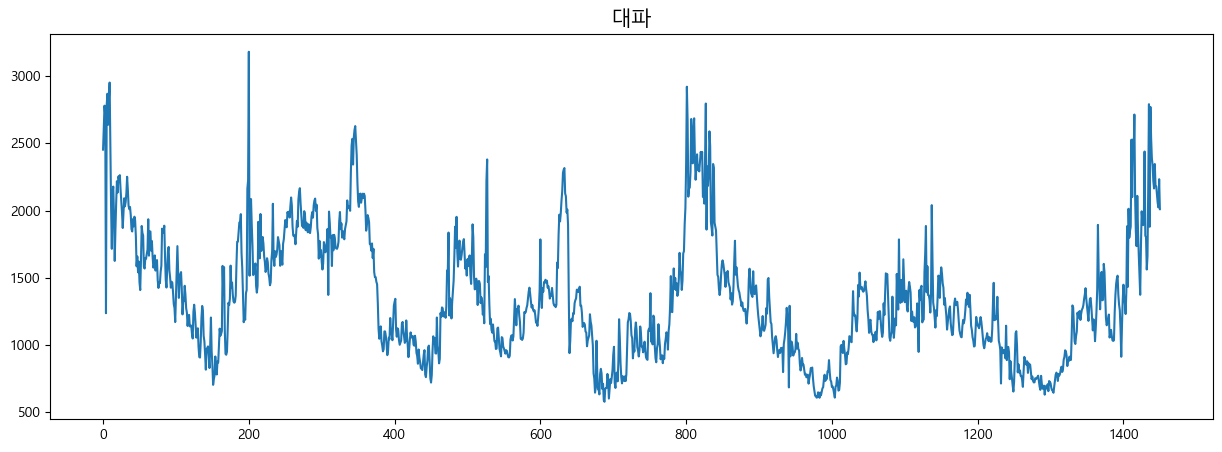

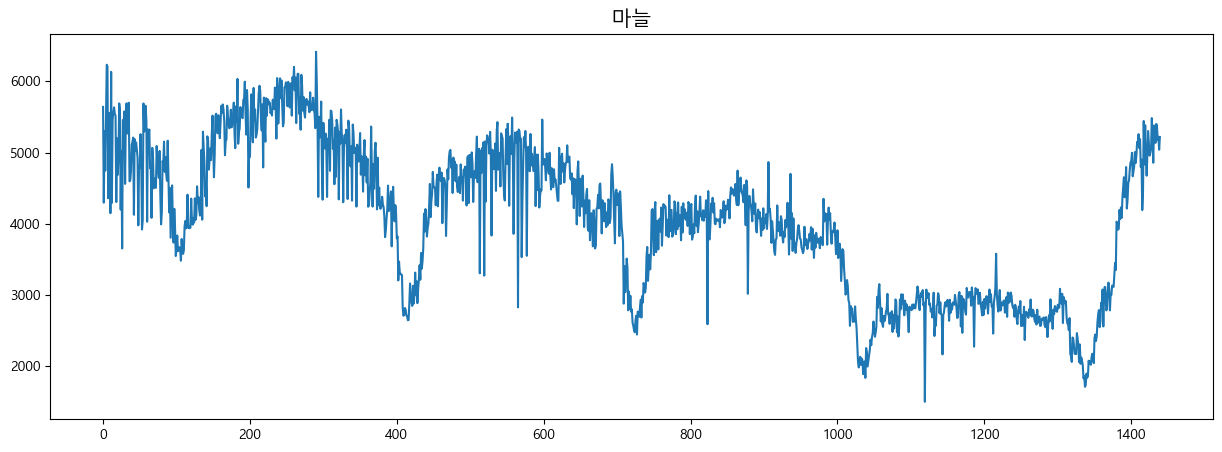

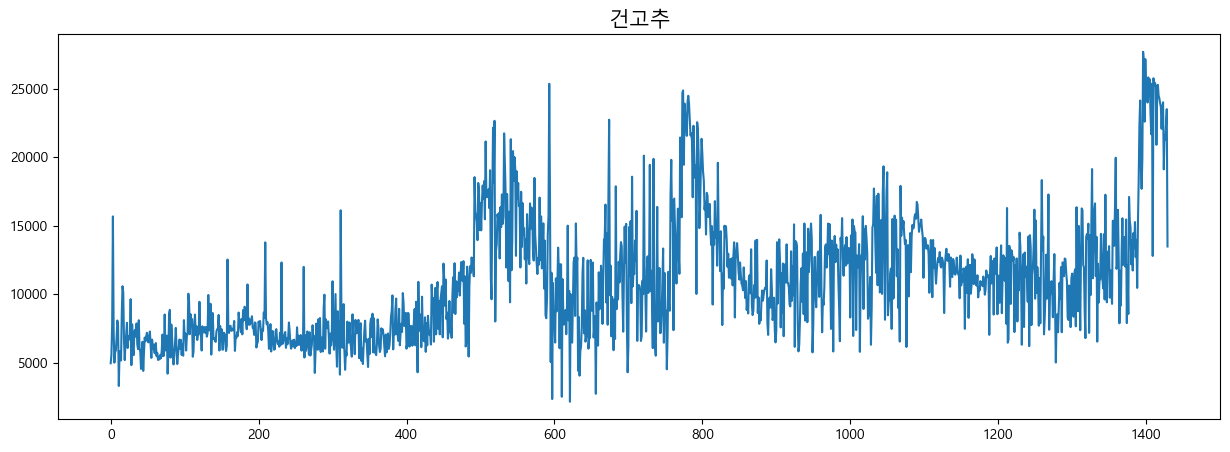

In [5]:
pum_lst = df.PUM_NM.unique()

for pum in pum_lst :
    df_pum = select_pum2(df, pum, 7)
    # lineplot 확인 -> 계절성 확인 (최적의 fold 수를 정하기 위해)
    df_pum['mean_price'].plot(figsize = (15,5))
    plt.title(f'{pum}', fontsize = 15)
    plt.show()

### 사과 Optuna - lightGBM 적용

In [3]:
apple = select_pum2(df, '사과', 7)
apple['1week'][-20:] # 확인

1418    2945
1419    2843
1420    2916
1421    2987
1422    3149
1423    3180
1424    3165
1425    3063
1426    3094
1427    3256
1428    3355
1429    3422
1430    3426
1431    3477
1432    3325
1433    3184
1434    3096
1435    3244
1436    3188
1437    3256
Name: 1week, dtype: int64

In [4]:
train_X, test_X, train_y, test_y = pre_2(df, '사과', 7)

(1138, 19) (1138,) (300, 19) (300,)


In [5]:
train_X.columns

Index(['TOT_AMT', 'TOT_QTY', 'mean_price', 'p_lag_1', 'p_lag_2', 'p_lag_3',
       'p_lag_4', 'p_lag_5', 'p_lag_6', 'p_lag_7', 'resid', 'trend', 'season',
       'mean_price_5', 'mean_price_30', 'ratio_mean_price_5_30', 'std_price_5',
       'std_price_30', 'ratio_std_price_5_30'],
      dtype='object')

In [6]:
cut = int(len(train_X)*0.8)

h_train_X = train_X[:cut]
h_train_y = train_y[:cut]

h_valid_X = train_X[cut:]
h_valid_y = train_y[cut:]

print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(910, 19) (910,) (228, 19) (228,)


In [ ]:
!pip install scikit-optimize

- optuna.trial.Trial.suggest_categorical() : 리스트 범위 내에서 값을 선택한다.
- optuna.trial.Trial.suggest_int() : 범위 내에서 정수형 값을 선택한다.
- optuna.trial.Trial.suggest_float() : 범위 내에서 소수형 값을 선택한다.
- optuna.trial.Trial.suggest_uniform() : 범위 내에서 균일분포 값을 선택한다.
- optuna.trial.Trial.suggest_discrete_uniform() : 범위 내에서 이산 균일분포 값을 선택한다.
    - suggest_discrete_uniform(name, low, high, q)
- optuna.trial.Trial.suggest_loguniform() : 범위 내에서 로그 함수 값을 선택한다.

In [ ]:
# # LightGBM Optuna 사용

# from optuna.samplers import TPESampler
# from optuna.integration import SkoptSampler

# sampler = SkoptSampler(seed=10)

# def objective(trial):
#     # dtrain = LGBMRegressor.Dataset(h_train_X, label=h_train_y)
#     # dtest = LGBMRegressor.Dataset(h_valid_X, label=h_valid_y)

#     param = {
#         'objective': 'regression', # 회귀
#         'verbose': -1,
#         'metric': 'mape', 
#         'num_leaves' : trial.suggest_int('num_leaves', 10, 100), # default : 31
#         'max_depth': trial.suggest_int('max_depth',3, 10), # default : -1
#         'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 2000), # default : 100 반복 수행하는 트리의 개수 / 값이 크면 학습 시간이 오래 걸리고 과적합이 발생할 수 있음
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100), # default : 20 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1), # default : 1.0 과적합되는 것을 제어
#         'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.5) # default : 1.0 개별 트리를 학습할 때마다 무작위로 선택하는 feature의 비율이다
#     } 

#     model = LGBMRegressor(**param)
#     lgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
#     mape = MAPE(h_valid_y, lgb_model.predict(h_valid_X))
#     return mape
        
# study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
# study_lgb.optimize(objective, n_trials=200)

In [11]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\n params {}'.format(trial.value, trial_params))

Best Trial: score 0.09572095769745081,
 params {'num_leaves': 11, 'max_depth': 7, 'learning_rate': 0.00946815613131426, 'n_estimators': 1807, 'min_child_samples': 48, 'subsample': 0.9976497162892823, 'colsample_bytree': 0.5}


In [12]:

final_lgb_model = LGBMRegressor(**trial_params)
final_lgb_model.fit(train_X, train_y)
final_lgb_pred = final_lgb_model.predict(test_X)

In [20]:
# 값이 왜 0이 나오는건지..
test_y[-14:]

1438    0
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
Name: 1week, dtype: int64

In [ ]:
# 실제값 예측값 시각화

plt.figure(figsize = (15,5))
plt.plot(final_lgb_pred, label = 'predicted')
plt.plot(np.array(test_y), label = 'Actual')
plt.legend()
plt.title('apple LGBM Predicted VS Actual visual', fontsize = 15)
plt.show()

In [14]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study_lgb)

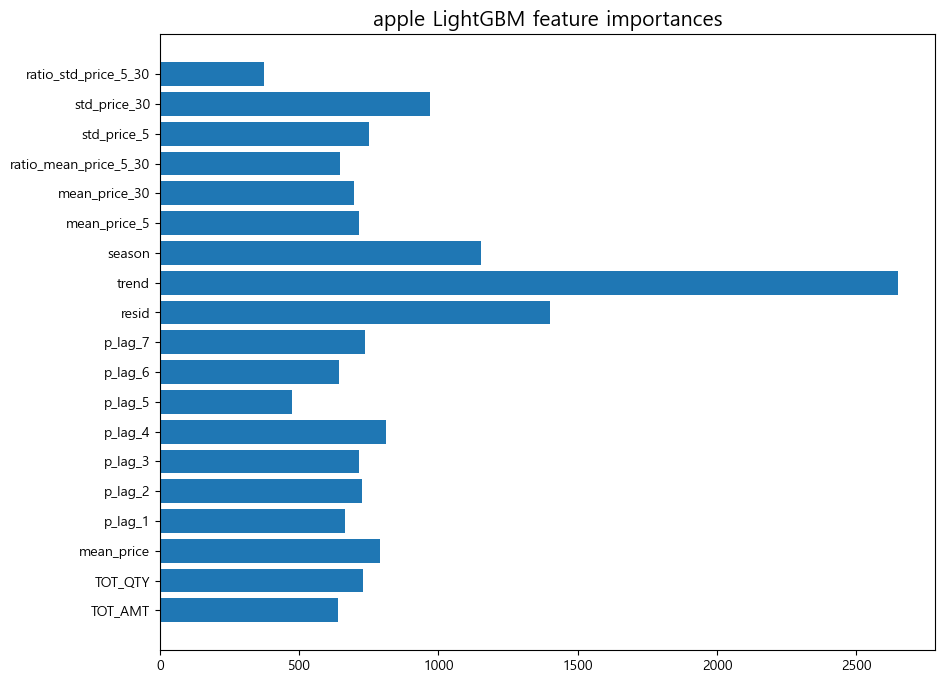

In [15]:
# LightGBM feature importances 시각화

plt.figure(figsize = (10,8))
plt.barh(train_X.columns, final_lgb_model.feature_importances_)
plt.title('apple LightGBM feature importances', fontsize = 15)
plt.show()

## 전품종 Optuna - lightGBM 적용

#### Optuna 적용 전

(1138, 19) (1138,) (300, 19) (300,)
사과
(910, 19) (910,) (228, 19) (228,)
(300,) (300,)
사과 default LGBM model MAPE : 0.14316108889611223


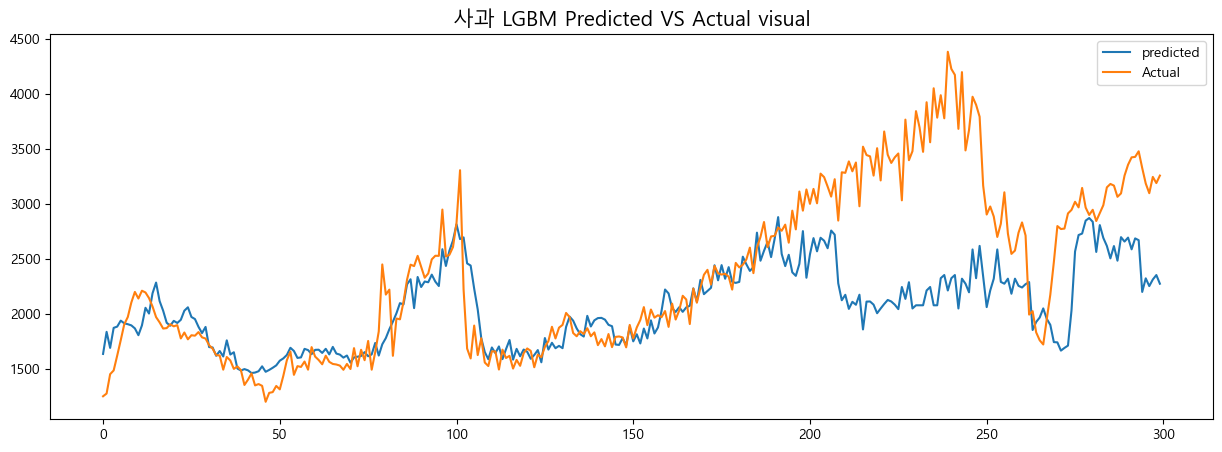

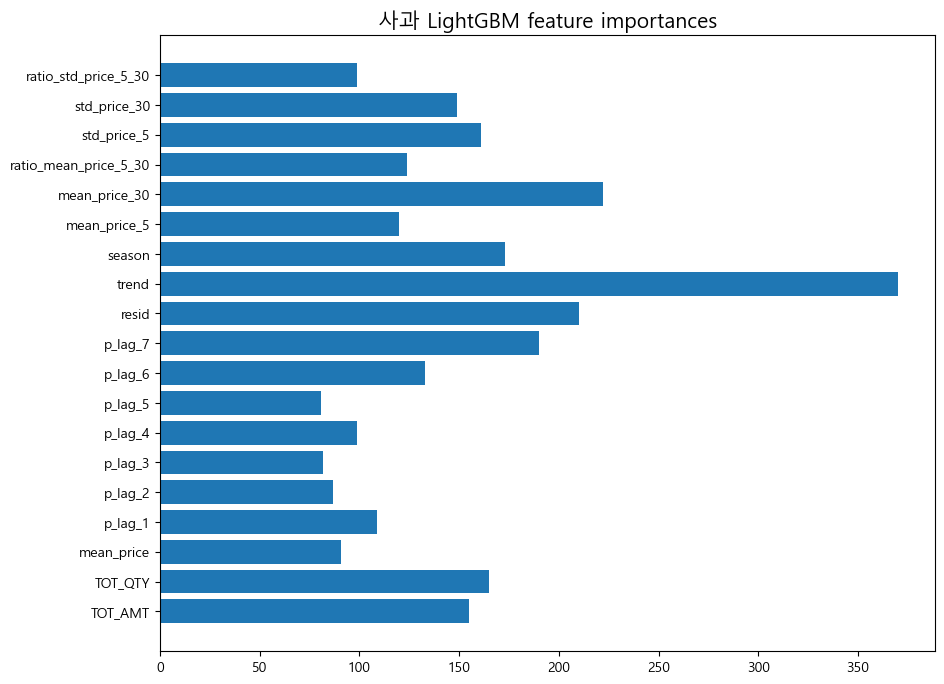

(1138, 19) (1138,) (300, 19) (300,)
배추
(910, 19) (910,) (228, 19) (228,)
(300,) (300,)
배추 default LGBM model MAPE : 0.09901343626680818


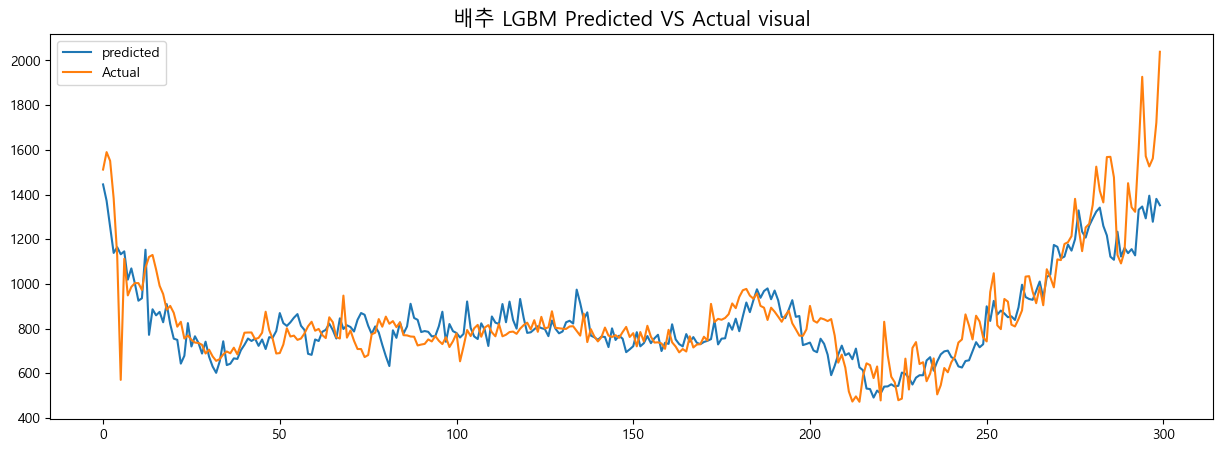

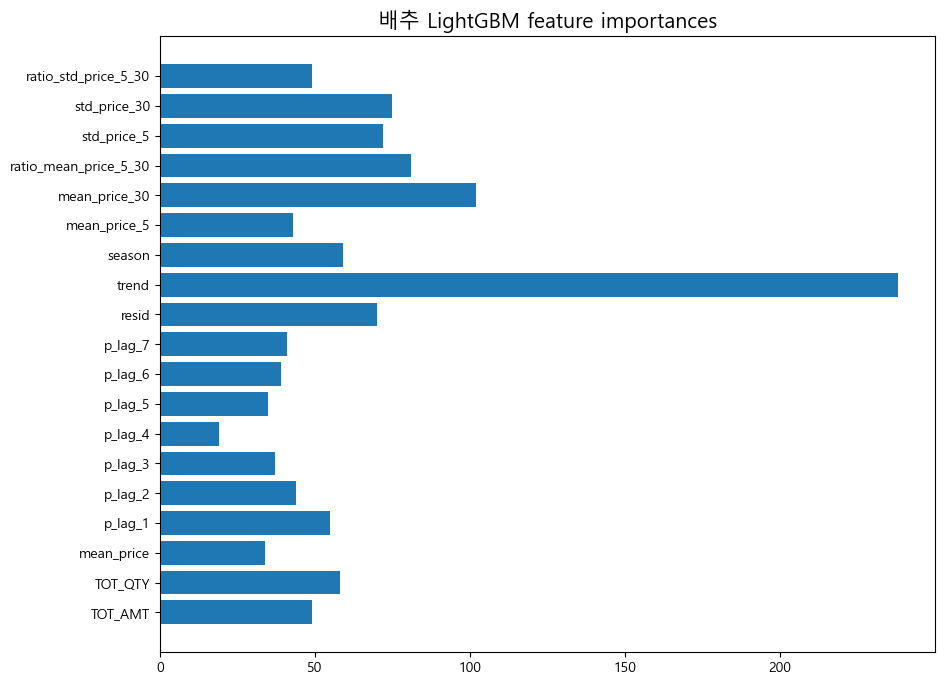

(1138, 19) (1138,) (299, 19) (299,)
무
(910, 19) (910,) (228, 19) (228,)
(299,) (299,)
무 default LGBM model MAPE : 0.11508341478394196


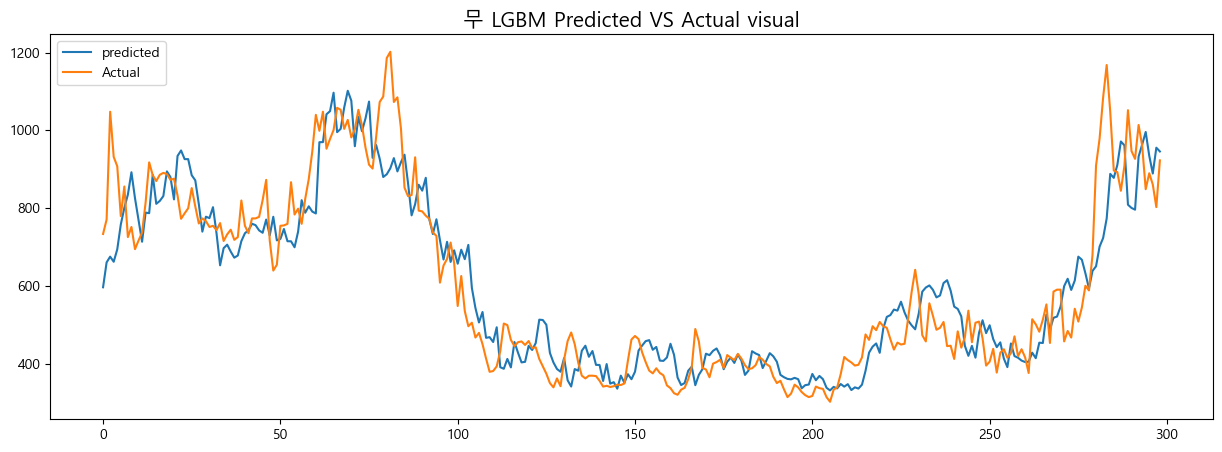

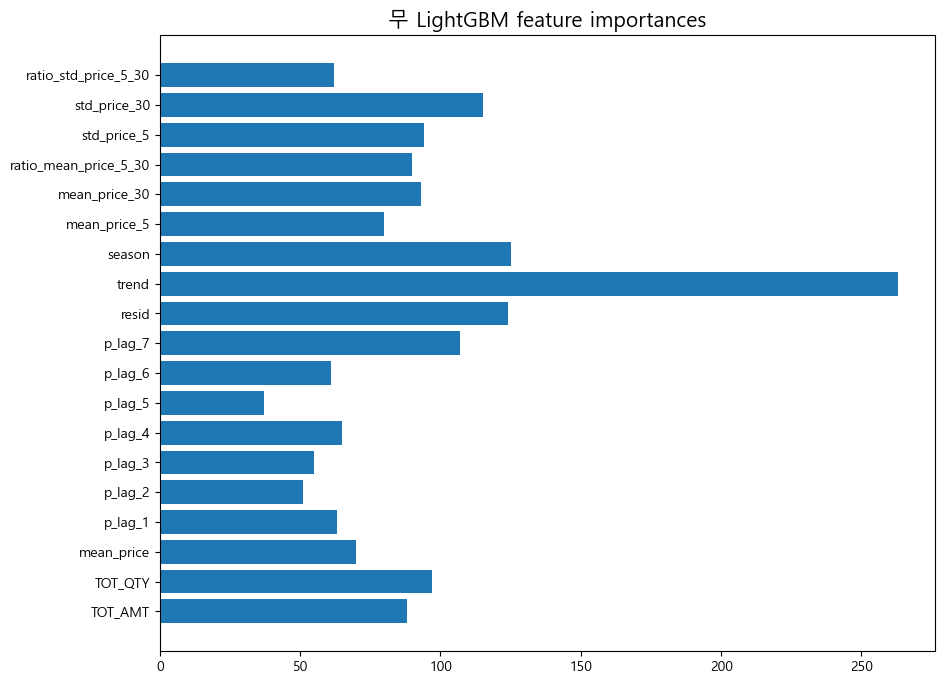

(1134, 19) (1134,) (301, 19) (301,)
양파
(907, 19) (907,) (227, 19) (227,)
(301,) (301,)
양파 default LGBM model MAPE : 0.08918454574091593


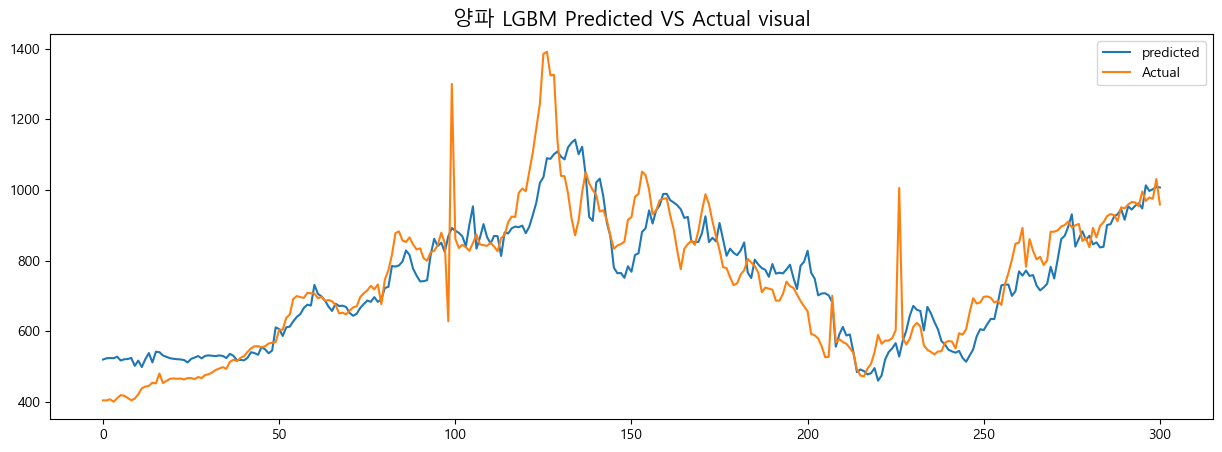

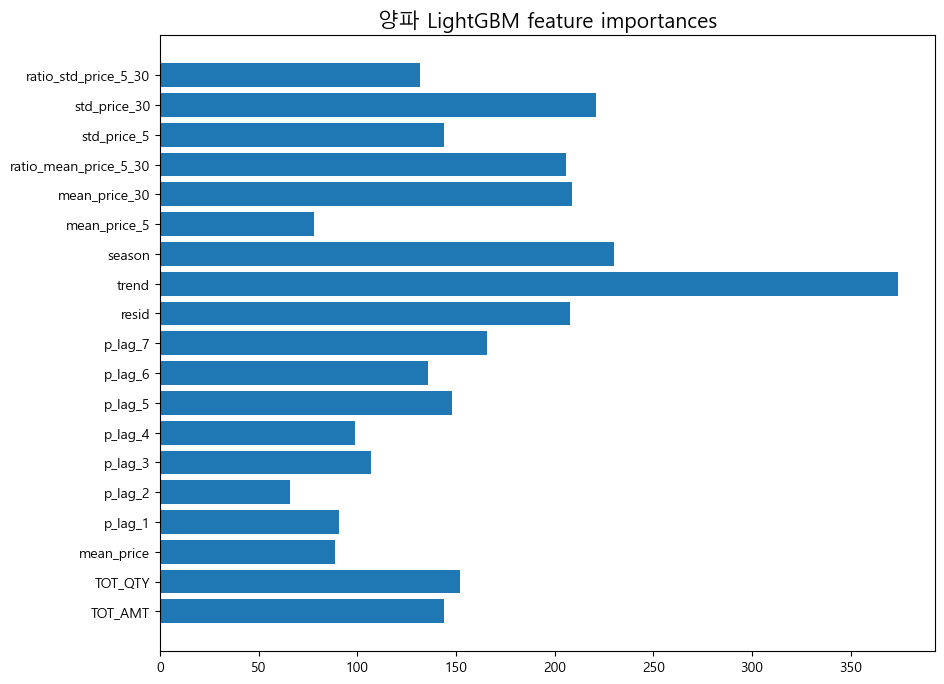

(1137, 19) (1137,) (300, 19) (300,)
대파
(909, 19) (909,) (228, 19) (228,)
(300,) (300,)
대파 default LGBM model MAPE : 0.12314718385835081


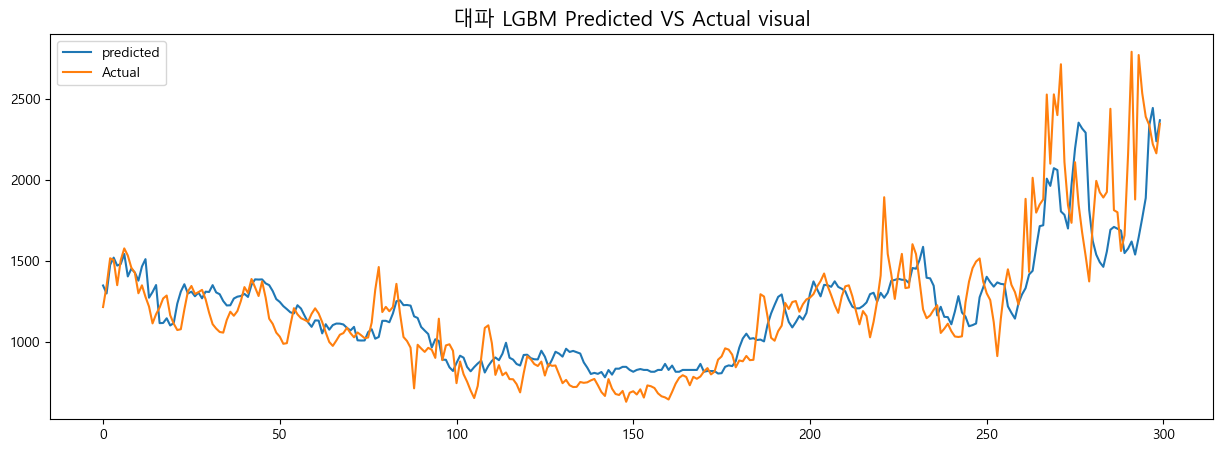

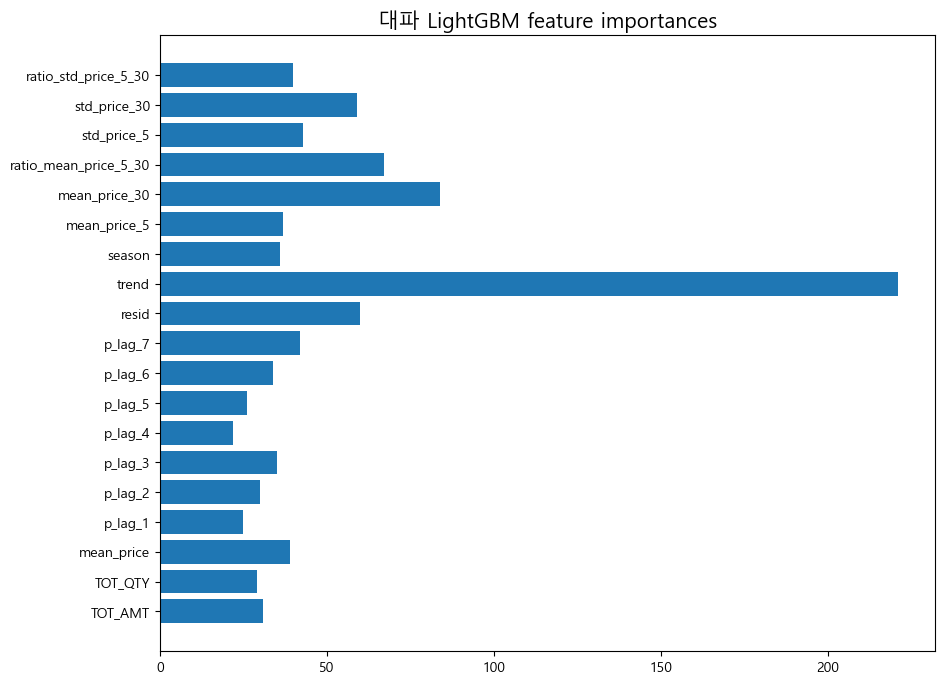

(1130, 19) (1130,) (296, 19) (296,)
마늘
(904, 19) (904,) (226, 19) (226,)
(296,) (296,)
마늘 default LGBM model MAPE : 0.1926679993144417


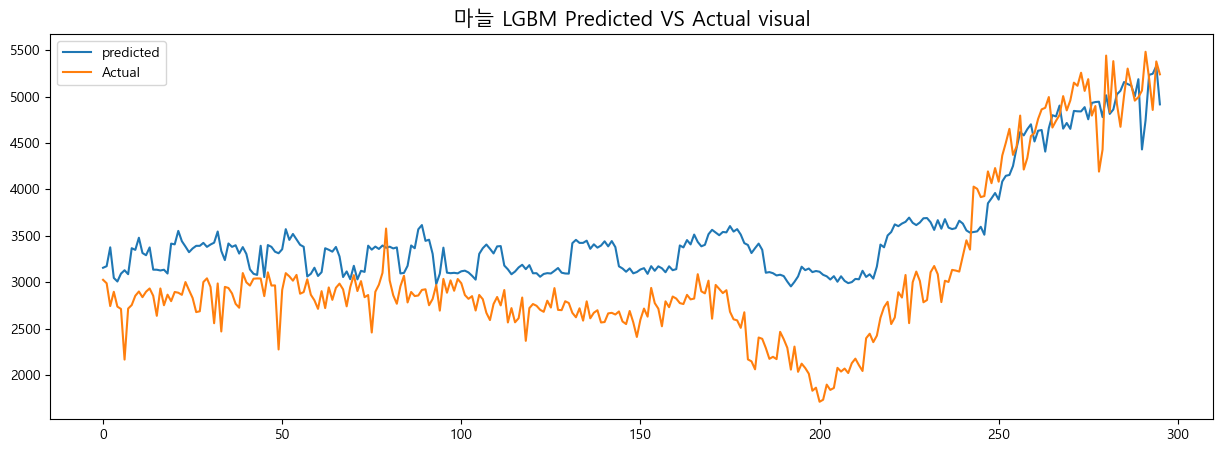

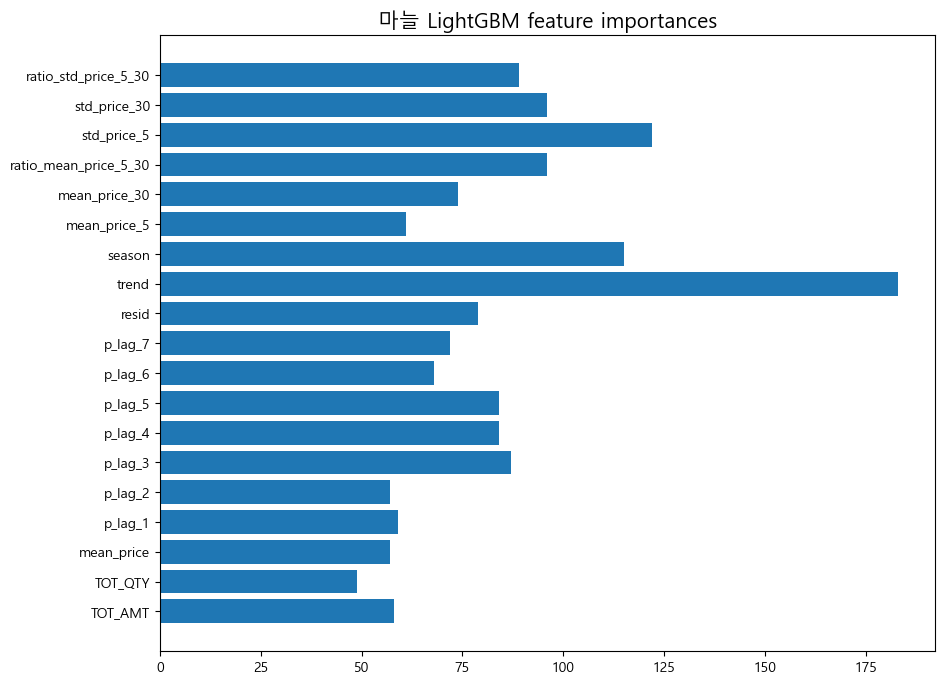

(1121, 19) (1121,) (295, 19) (295,)
건고추
(896, 19) (896,) (225, 19) (225,)
(295,) (295,)
건고추 default LGBM model MAPE : 0.20555695591190426


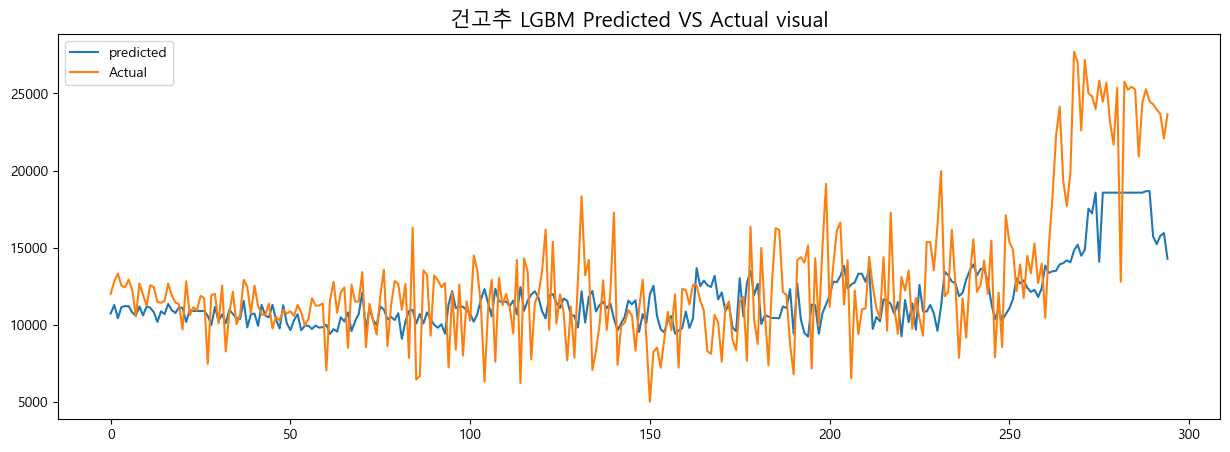

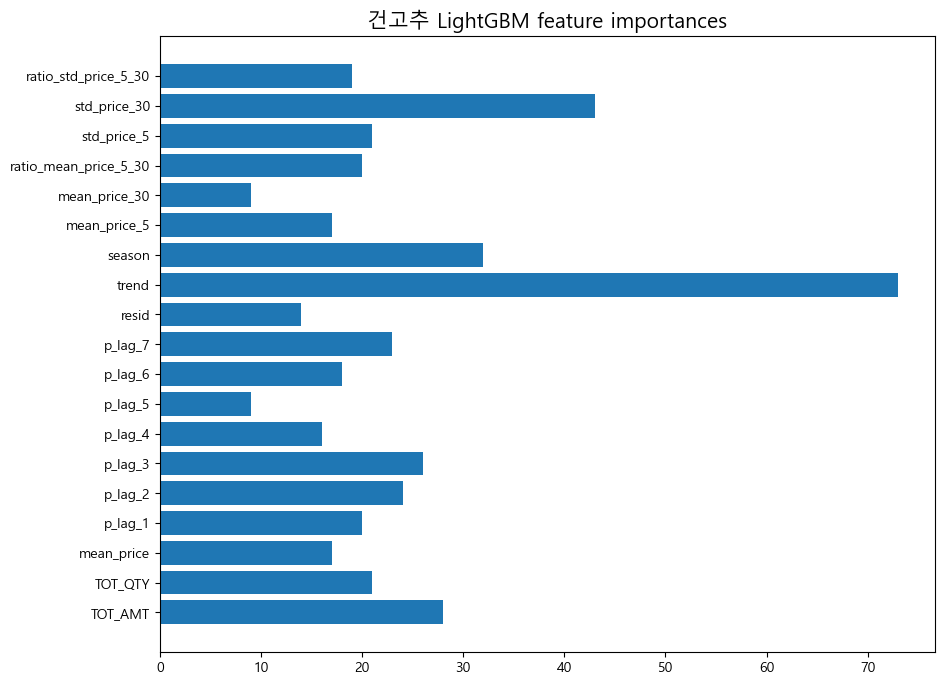

In [8]:
for pum in df.PUM_NM.unique() :
    train_X, test_X, train_y, test_y = pre_2(df, pum, 7)
    print(f'{pum}')

    cut = int(len(train_X)*0.8)

    h_train_X = train_X[:cut]
    h_train_y = train_y[:cut]

    h_valid_X = train_X[cut:]
    h_valid_y = train_y[cut:]

    print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)


    model = LGBMRegressor()
    lgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
    lgb_pred = lgb_model.predict(test_X)
    mape = MAPE(test_y, lgb_pred)

    print(lgb_pred.shape, test_y.shape)
    print(f'{pum} default LGBM model MAPE :', mape)

    # 실제값 예측값 시각화

    plt.figure(figsize = (15,5))
    plt.plot(lgb_pred, label = 'predicted')
    plt.plot(np.array(test_y), label = 'Actual')
    plt.legend()
    plt.title(f'{pum} LGBM Predicted VS Actual visual', fontsize = 15)
    plt.show()

    # LightGBM feature importances 시각화

    plt.figure(figsize = (10,8))
    plt.barh(train_X.columns, lgb_model.feature_importances_)
    plt.title(f'{pum} LightGBM feature importances', fontsize = 15)
    plt.show()

#### Optuna 적용 후
- 10/20 멘토링 받은 내용으로 수정 후 Optuna 다시 실행함

[I 2022-10-20 14:31:44,367] A new study created in memory with name: no-name-db293c0e-b721-4c6f-8b55-5a7582e9bcc4


(1138, 19) (1138,) (300, 19) (300,)
사과
(910, 19) (910,) (228, 19) (228,)


[I 2022-10-20 14:31:44,775] Trial 0 finished with value: 0.11154579247452584 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.11154579247452584.
[I 2022-10-20 14:31:45,053] Trial 1 finished with value: 0.10487021136247475 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.10487021136247475.
[I 2022-10-20 14:31:45,316] Trial 2 finished with value: 0.10487021136247475 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.10487021136247475.
[I 2022-10-20 14:31:45,567] Trial 3 finished with value: 0.10487021136247475 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.10487021136247475.
[I 2022-10-20 

Best Trial: score 0.09153243050164493,
 params {'max_depth': 3, 'learning_rate': 0.09999999999999999, 'n_estimators': 1061, 'min_child_samples': 5}


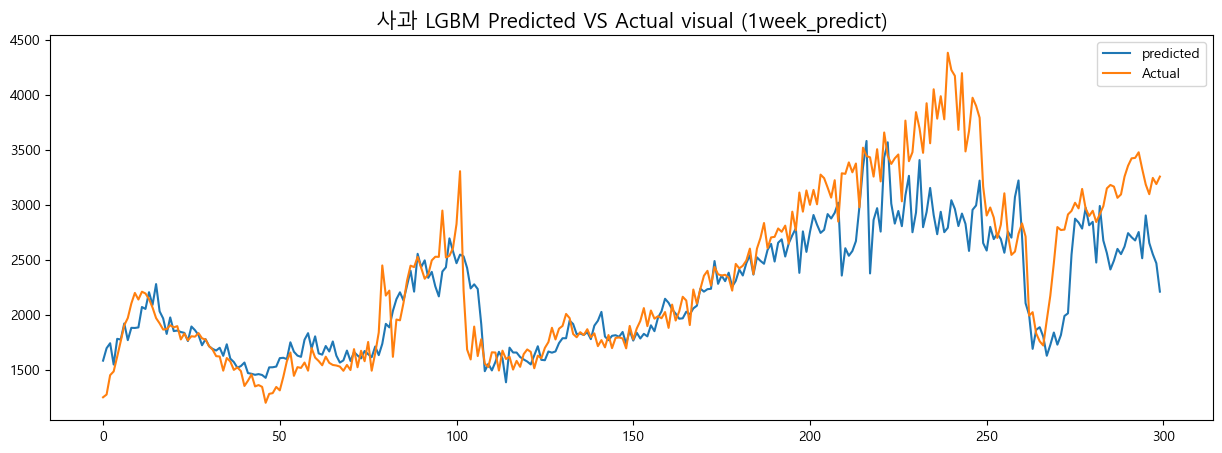

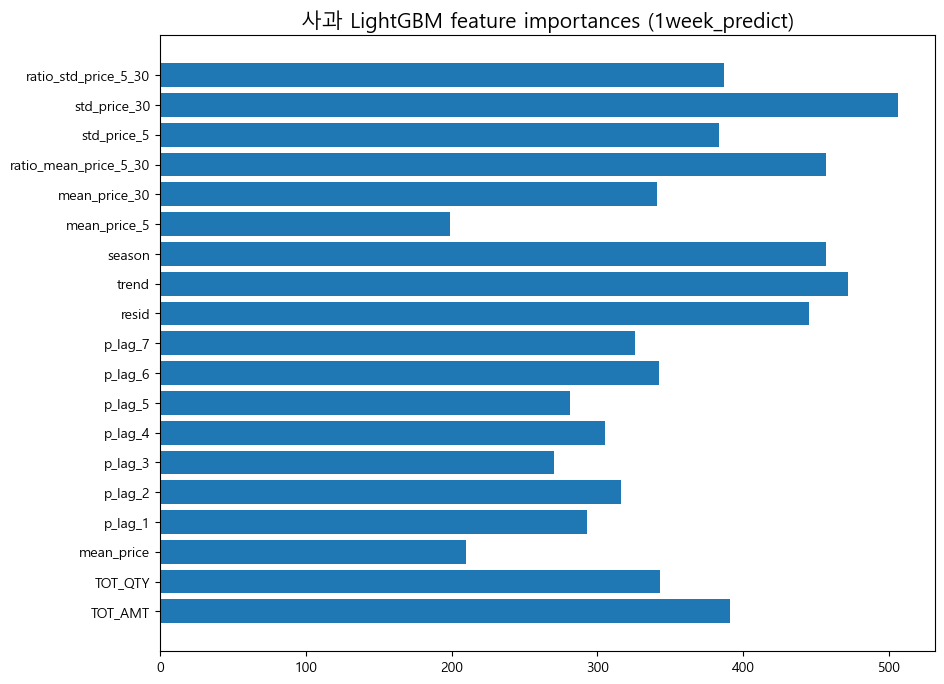

[I 2022-10-20 14:33:10,295] A new study created in memory with name: no-name-9666e2aa-8634-4305-8401-6ffae4e4c8fc


(1138, 19) (1138,) (300, 19) (300,)
배추
(910, 19) (910,) (228, 19) (228,)


[I 2022-10-20 14:33:10,662] Trial 0 finished with value: 0.2975632970848705 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.2975632970848705.
[I 2022-10-20 14:33:11,018] Trial 1 finished with value: 0.18278841706037816 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.18278841706037816.
[I 2022-10-20 14:33:11,391] Trial 2 finished with value: 0.18278841706037816 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.18278841706037816.
[I 2022-10-20 14:33:11,760] Trial 3 finished with value: 0.18278841706037816 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.18278841706037816.
[I 2022-10-20 14

Best Trial: score 0.1410681628710397,
 params {'max_depth': 9, 'learning_rate': 0.03355104765892377, 'n_estimators': 1551, 'min_child_samples': 5}


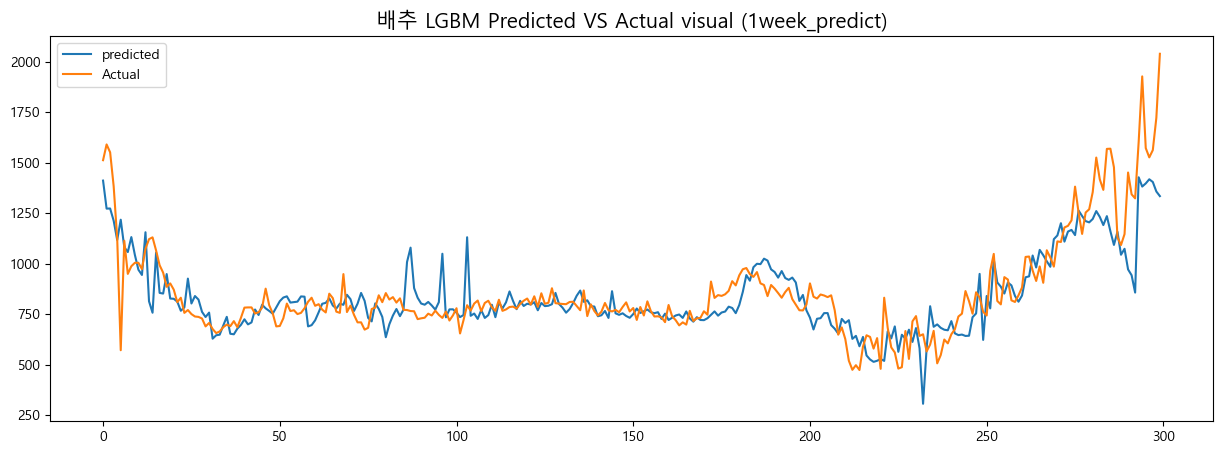

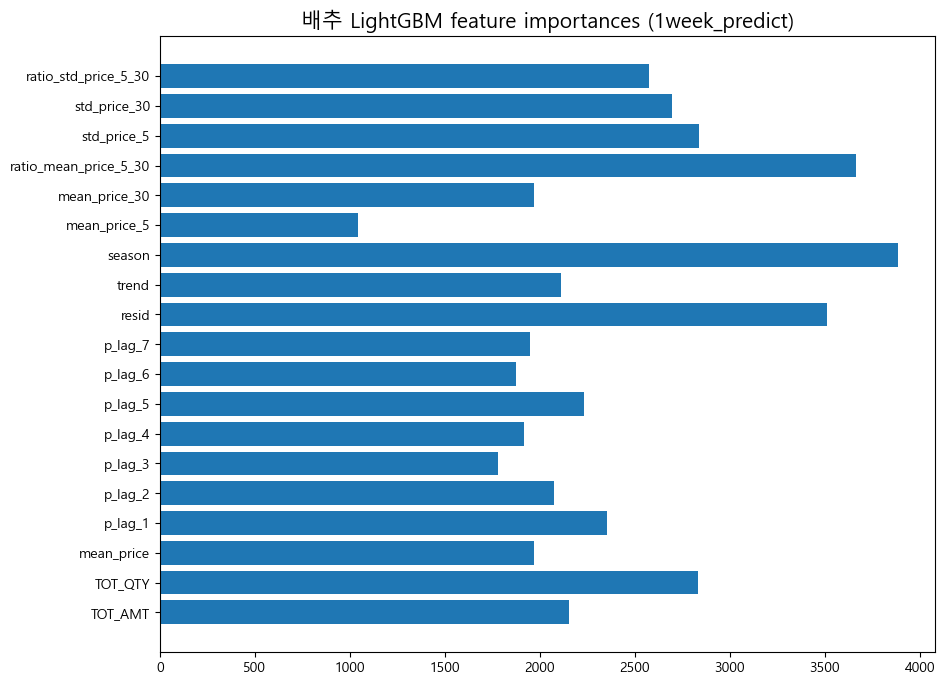

[I 2022-10-20 14:34:40,078] A new study created in memory with name: no-name-2990f3e7-b393-4907-bcbd-67d5c77a6bf0


(1138, 19) (1138,) (299, 19) (299,)
무
(910, 19) (910,) (228, 19) (228,)


[I 2022-10-20 14:34:40,444] Trial 0 finished with value: 0.29821871732020777 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.29821871732020777.
[I 2022-10-20 14:34:41,124] Trial 1 finished with value: 0.14398207276404082 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.14398207276404082.
[I 2022-10-20 14:34:41,800] Trial 2 finished with value: 0.14398207276404082 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.14398207276404082.
[I 2022-10-20 14:34:42,506] Trial 3 finished with value: 0.14398207276404082 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.14398207276404082.
[I 2022-10-20 

Best Trial: score 0.13313175133218005,
 params {'max_depth': 9, 'learning_rate': 0.09999999999999999, 'n_estimators': 263, 'min_child_samples': 53}


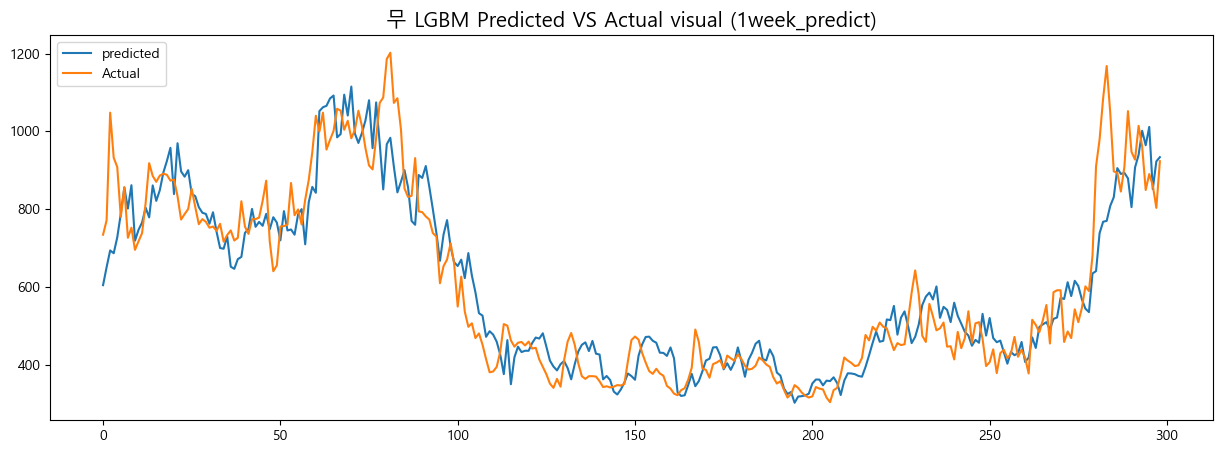

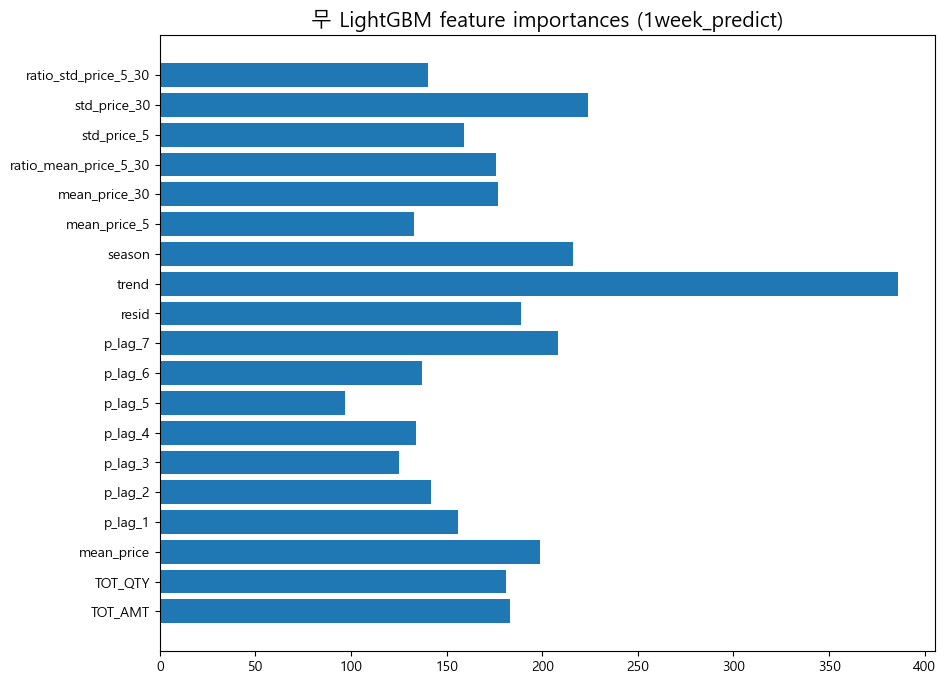

[I 2022-10-20 14:36:11,206] A new study created in memory with name: no-name-60edb232-1236-46b6-b69d-233a48112a00


(1134, 19) (1134,) (301, 19) (301,)
양파
(907, 19) (907,) (227, 19) (227,)


[I 2022-10-20 14:36:11,636] Trial 0 finished with value: 0.37465187767580066 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.37465187767580066.
[I 2022-10-20 14:36:12,362] Trial 1 finished with value: 0.23366421551812394 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.23366421551812394.
[I 2022-10-20 14:36:13,065] Trial 2 finished with value: 0.23366421551812394 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.23366421551812394.
[I 2022-10-20 14:36:13,747] Trial 3 finished with value: 0.23366421551812394 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.23366421551812394.
[I 2022-10-20 

Best Trial: score 0.20135455403082608,
 params {'max_depth': 3, 'learning_rate': 0.09999999999999999, 'n_estimators': 428, 'min_child_samples': 5}


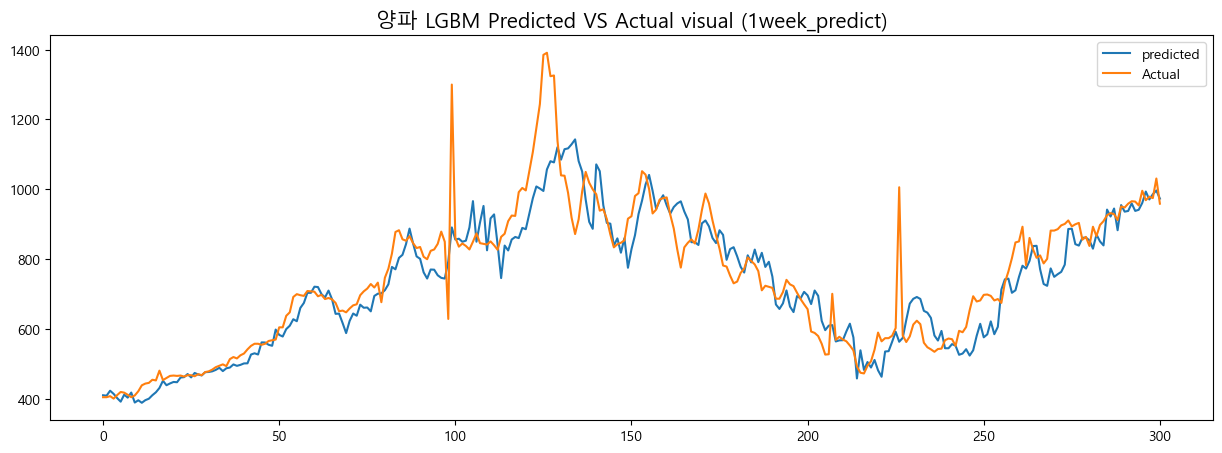

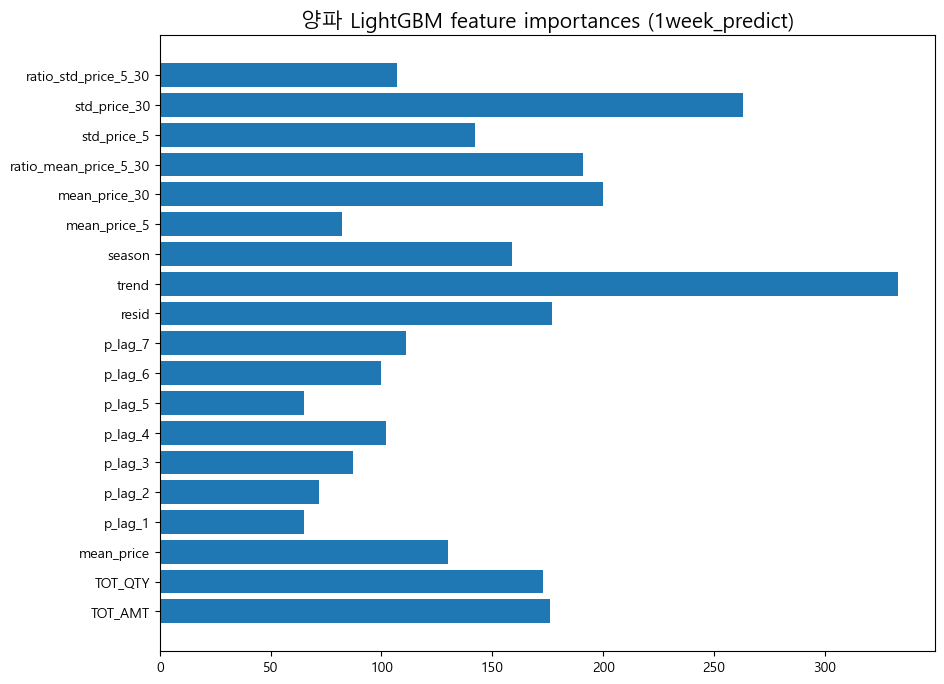

[I 2022-10-20 14:37:35,480] A new study created in memory with name: no-name-e12e38fc-0abe-4645-bcb6-e2d5d0e4b00c


(1137, 19) (1137,) (300, 19) (300,)
대파
(909, 19) (909,) (228, 19) (228,)


[I 2022-10-20 14:37:35,913] Trial 0 finished with value: 0.19225223419720625 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.19225223419720625.
[I 2022-10-20 14:37:36,412] Trial 1 finished with value: 0.13251906082007303 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.13251906082007303.
[I 2022-10-20 14:37:36,875] Trial 2 finished with value: 0.13251906082007303 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.13251906082007303.
[I 2022-10-20 14:37:37,376] Trial 3 finished with value: 0.13251906082007303 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.13251906082007303.
[I 2022-10-20 

Best Trial: score 0.11989035127178939,
 params {'max_depth': 15, 'learning_rate': 0.0539218307722648, 'n_estimators': 217, 'min_child_samples': 24}


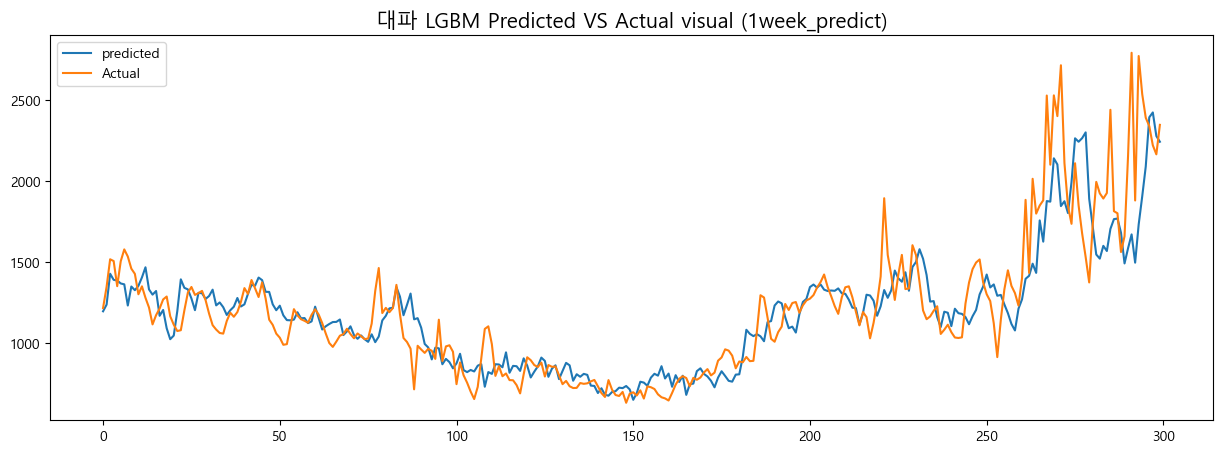

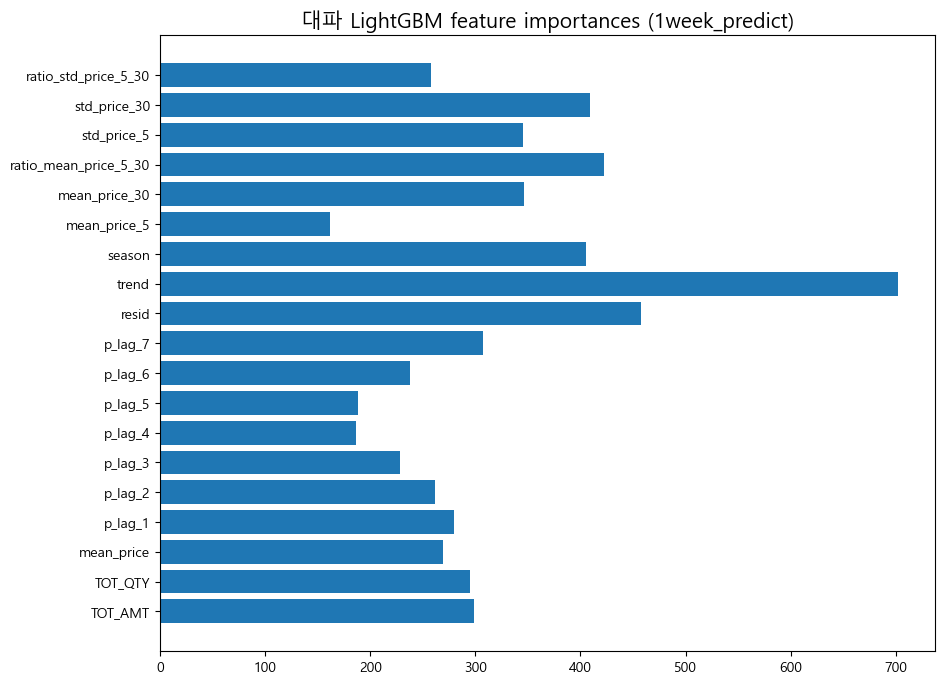

[I 2022-10-20 14:39:07,728] A new study created in memory with name: no-name-c53591e9-43e7-431d-aff4-1c9dfaa98fcd


(1130, 19) (1130,) (296, 19) (296,)
마늘
(904, 19) (904,) (226, 19) (226,)


[I 2022-10-20 14:39:08,176] Trial 0 finished with value: 0.2447796442356601 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.2447796442356601.
[I 2022-10-20 14:39:08,606] Trial 1 finished with value: 0.15925963837309567 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.15925963837309567.
[I 2022-10-20 14:39:09,087] Trial 2 finished with value: 0.15925963837309567 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.15925963837309567.
[I 2022-10-20 14:39:09,683] Trial 3 finished with value: 0.15925963837309567 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 1 with value: 0.15925963837309567.
[I 2022-10-20 14

Best Trial: score 0.1517999842885384,
 params {'max_depth': 15, 'learning_rate': 0.09999999999999999, 'n_estimators': 1120, 'min_child_samples': 42}


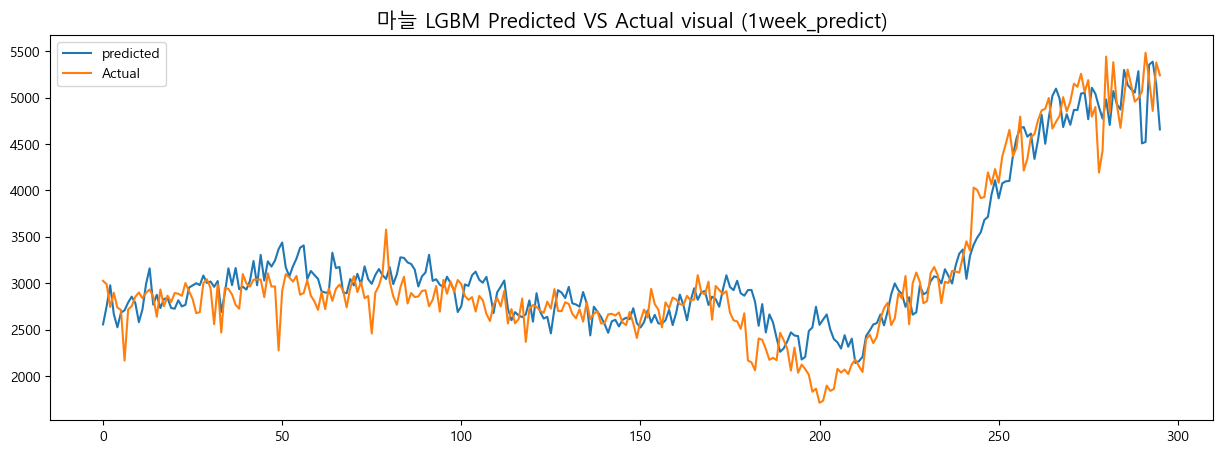

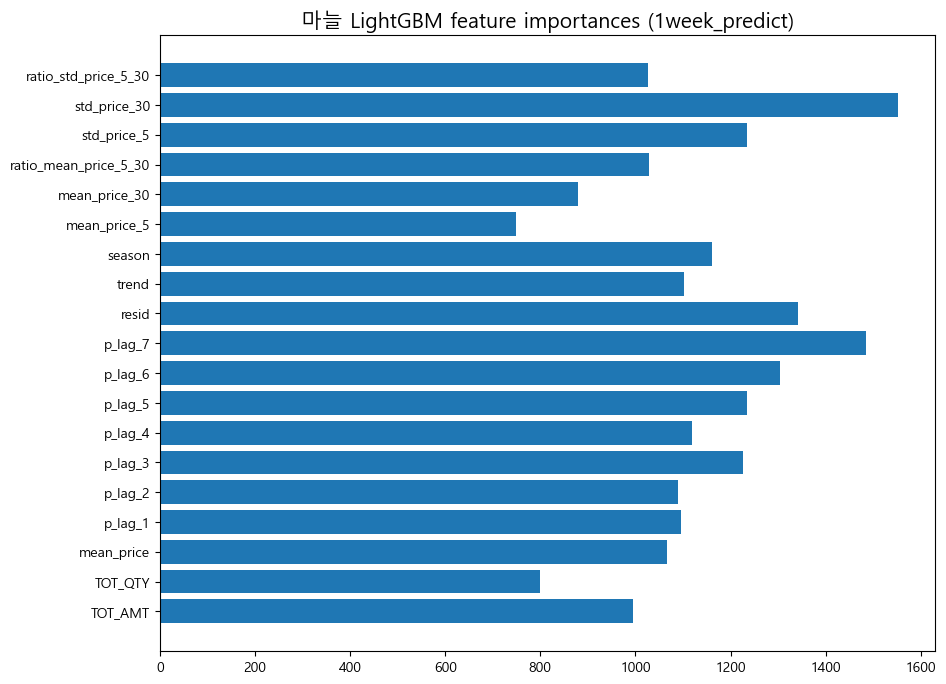

[I 2022-10-20 14:40:44,043] A new study created in memory with name: no-name-0e2d86ba-1fa5-4608-ac5c-7d886e9a044e


(1121, 19) (1121,) (295, 19) (295,)
건고추
(896, 19) (896,) (225, 19) (225,)


[I 2022-10-20 14:40:44,438] Trial 0 finished with value: 0.21408763917283516 and parameters: {'max_depth': 13, 'learning_rate': 0.0011002817226254391, 'n_estimators': 1304, 'min_child_samples': 76}. Best is trial 0 with value: 0.21408763917283516.
[I 2022-10-20 14:40:44,571] Trial 1 finished with value: 0.22257504503697315 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 0 with value: 0.21408763917283516.
[I 2022-10-20 14:40:44,712] Trial 2 finished with value: 0.22257504503697315 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 0 with value: 0.21408763917283516.
[I 2022-10-20 14:40:44,851] Trial 3 finished with value: 0.22257504503697315 and parameters: {'max_depth': 9, 'learning_rate': 0.003958423933267796, 'n_estimators': 1681, 'min_child_samples': 47}. Best is trial 0 with value: 0.21408763917283516.
[I 2022-10-20 

Best Trial: score 0.20690331688177438,
 params {'max_depth': 3, 'learning_rate': 0.0628033645841186, 'n_estimators': 350, 'min_child_samples': 86}


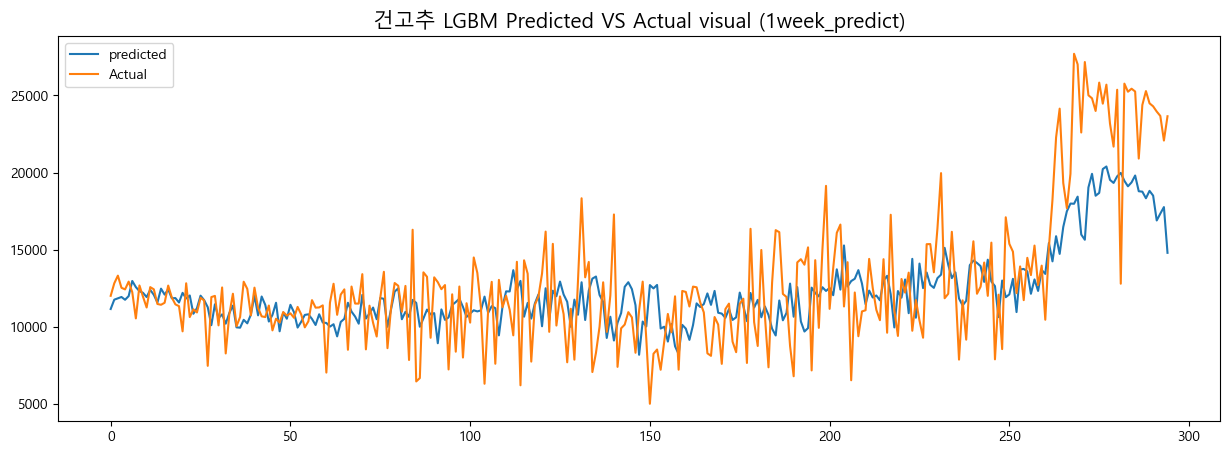

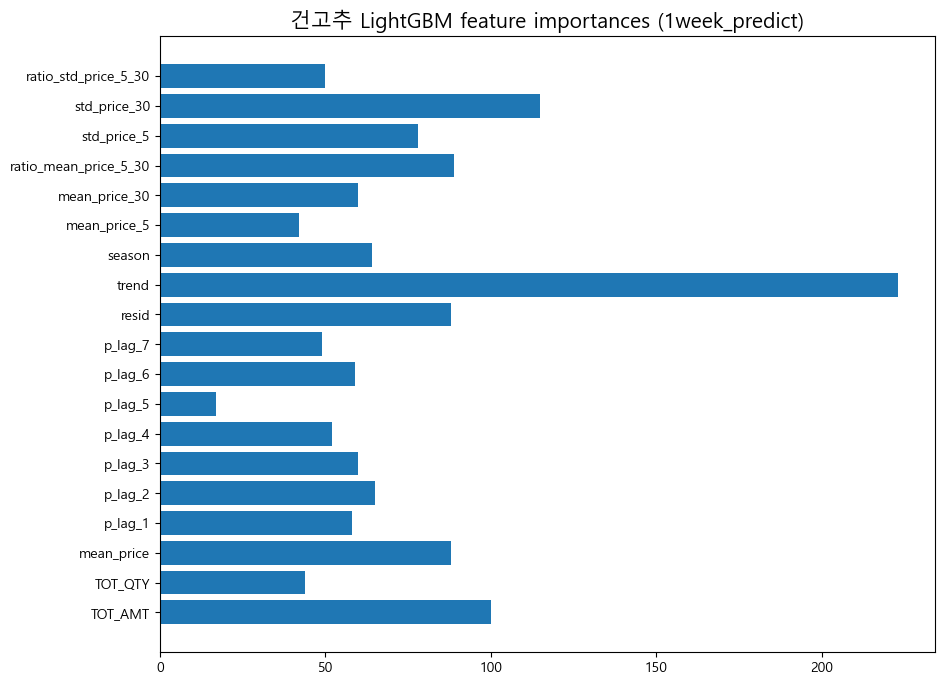

In [5]:
for pum in df.PUM_NM.unique() :

    train_X, test_X, train_y, test_y = pre_2(df, pum, 7)
    print(f'{pum}')

    cut = int(len(train_X)*0.8)

    h_train_X = train_X[:cut]
    h_train_y = train_y[:cut]

    h_valid_X = train_X[cut:]
    h_valid_y = train_y[cut:]

    print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

    # LightGBM Optuna 사용

    # from optuna.samplers import TPESampler
    from optuna.integration import SkoptSampler

    sampler = SkoptSampler(seed=10)

    def objective(trial):
        # dtrain = LGBMRegressor.Dataset(h_train_X, label=h_train_y)
        # dtest = LGBMRegressor.Dataset(h_valid_X, label=h_valid_y)

        param = {
            'objective': 'regression', # 회귀
            'verbose': -1,
            'metric': 'mape', 
            # 'num_leaves' : trial.suggest_int('num_leaves', 10, 100), # default : 31
            'max_depth': trial.suggest_int('max_depth',3, 15), # default : -1
            'learning_rate': trial.suggest_loguniform("learning_rate", 1e-3, 1e-1),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000), # default : 100 반복 수행하는 트리의 개수 / 값이 크면 학습 시간이 오래 걸리고 과적합이 발생할 수 있음
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100), # default : 20 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터
            # 'subsample': trial.suggest_uniform('subsample', 0.5, 1), # default : 1.0 과적합되는 것을 제어
            # 'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.5) # default : 1.0 개별 트리를 학습할 때마다 무작위로 선택하는 feature의 비율이다
        } 

        model = LGBMRegressor(**param)
        lgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
        mape = MAPE(h_valid_y, lgb_model.predict(h_valid_X))
        return mape
            
    study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
    study_lgb.optimize(objective, n_trials=100)

    trial = study_lgb.best_trial
    trial_params = trial.params
    print('Best Trial: score {},\n params {}'.format(trial.value, trial_params))

    final_lgb_model = LGBMRegressor(**trial_params)
    final_lgb_model.fit(train_X, train_y)
    final_lgb_pred = final_lgb_model.predict(test_X)

    # 실제값 예측값 시각화

    plt.figure(figsize = (15,5))
    plt.plot(final_lgb_pred, label = 'predicted')
    plt.plot(np.array(test_y), label = 'Actual')
    plt.legend()
    plt.title(f'{pum} LGBM Predicted VS Actual visual (1week_predict)', fontsize = 15)
    plt.show()

    # 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
    optuna.visualization.plot_param_importances(study_lgb)

    # LightGBM feature importances 시각화

    plt.figure(figsize = (10,8))
    plt.barh(train_X.columns, final_lgb_model.feature_importances_)
    plt.title(f'{pum} LightGBM feature importances (1week_predict)', fontsize = 15)
    plt.show()

#### LR 모델 

In [3]:
train_X, test_X, train_y, test_y = pre_2(df, '사과', 7)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

(1138, 19) (1138,) (300, 19) (300,)


((1138, 19), (300, 19), (1138,), (300,))

(1138, 19) (1138,) (300, 19) (300,)
사과
(300,) (300,)
사과 default LR model MAPE : 0.06711950132778015
(300,) (300,)
사과 default LGBM model MAPE : 0.12537305529486986


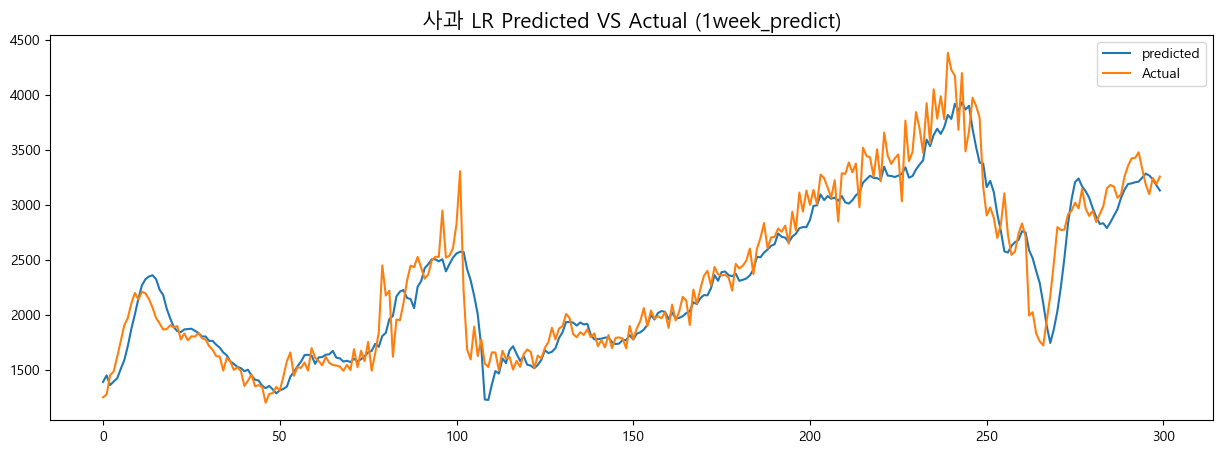

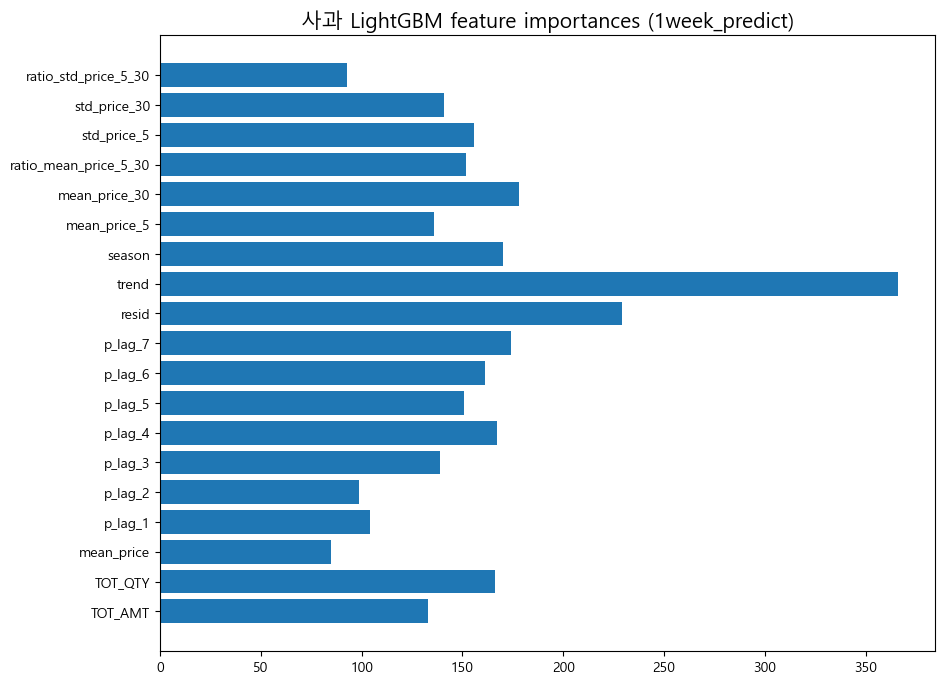

(1138, 19) (1138,) (300, 19) (300,)
배추
(300,) (300,)
배추 default LR model MAPE : 0.07481779499945482
(300,) (300,)
배추 default LGBM model MAPE : 0.09919163107911712


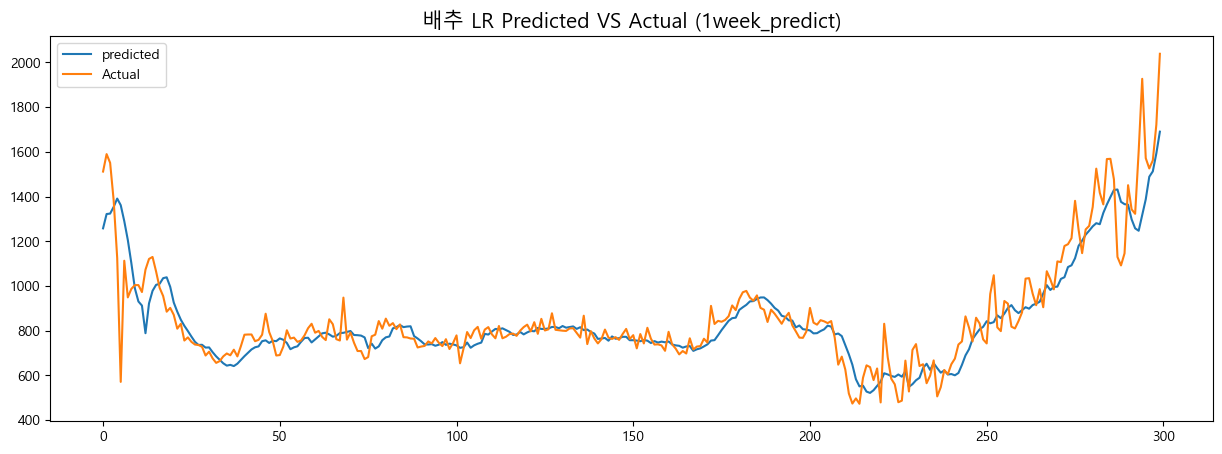

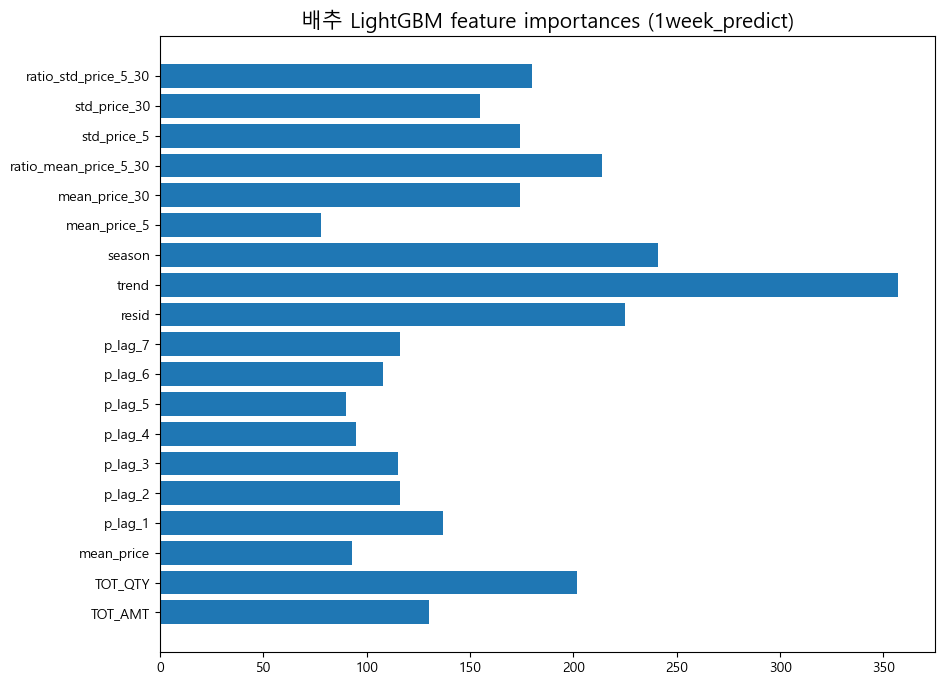

(1138, 19) (1138,) (299, 19) (299,)
무
(299,) (299,)
무 default LR model MAPE : 0.0852609822287381
(299,) (299,)
무 default LGBM model MAPE : 0.11021340418740355


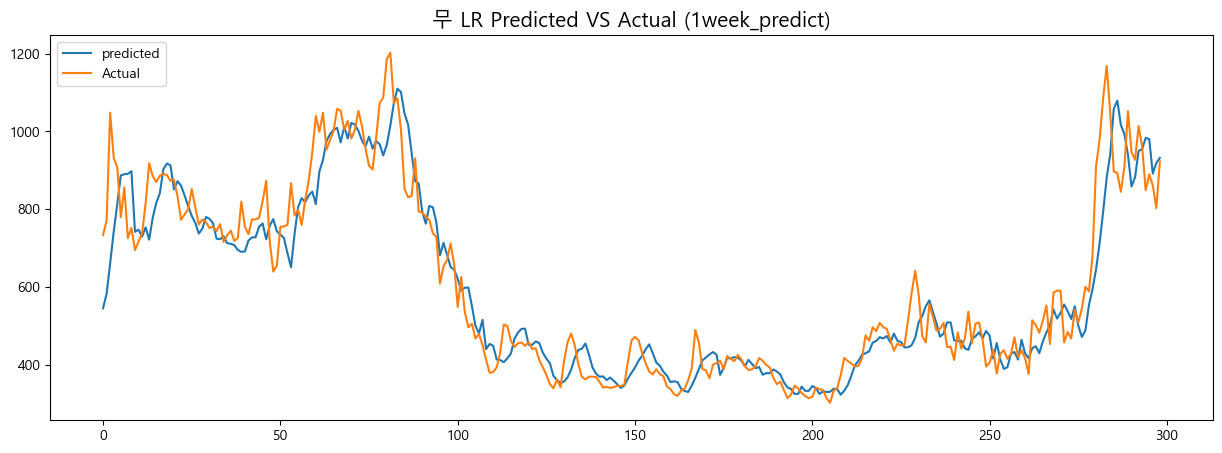

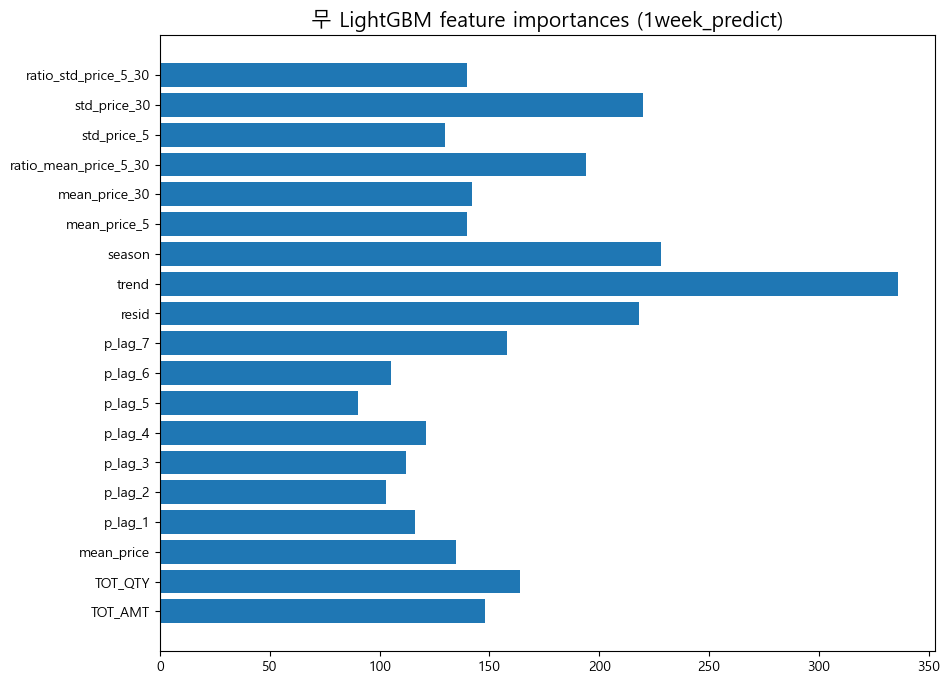

(1134, 19) (1134,) (301, 19) (301,)
양파
(301,) (301,)
양파 default LR model MAPE : 0.0553046758661982
(301,) (301,)
양파 default LGBM model MAPE : 0.07364232212850648


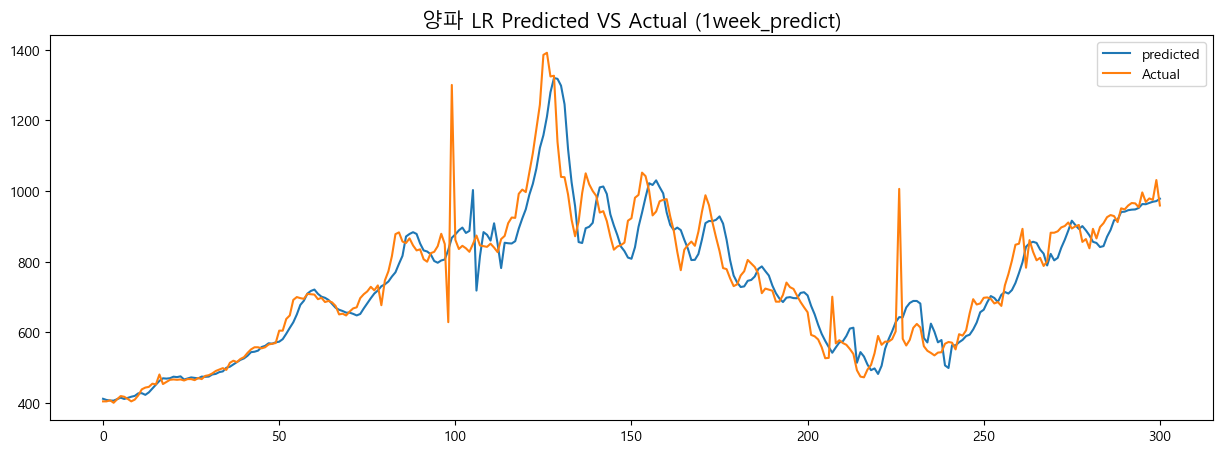

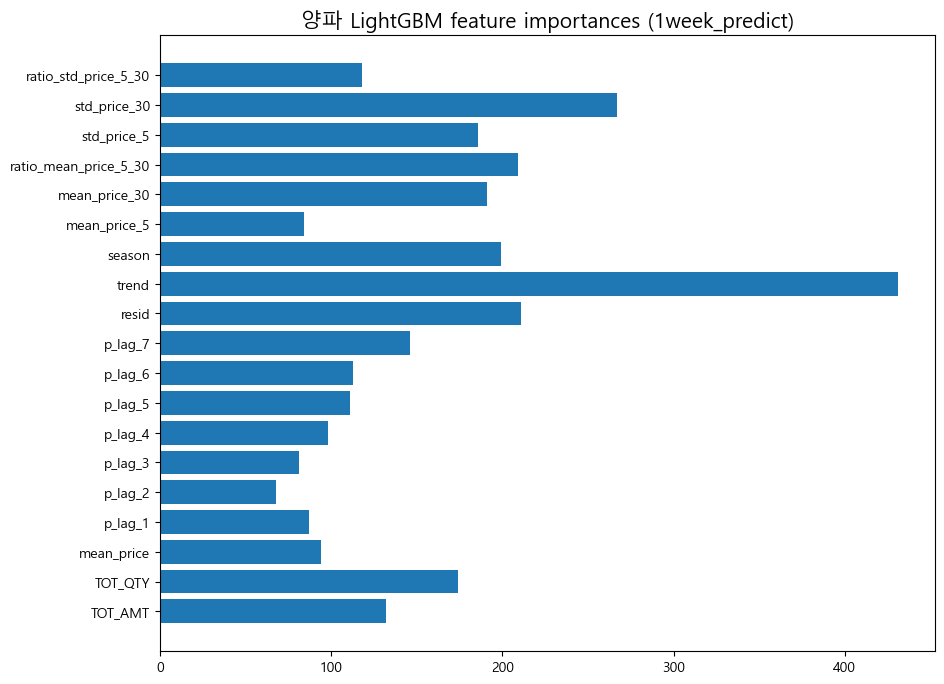

(1137, 19) (1137,) (300, 19) (300,)
대파
(300,) (300,)
대파 default LR model MAPE : 0.08878293033351388
(300,) (300,)
대파 default LGBM model MAPE : 0.10711893203103341


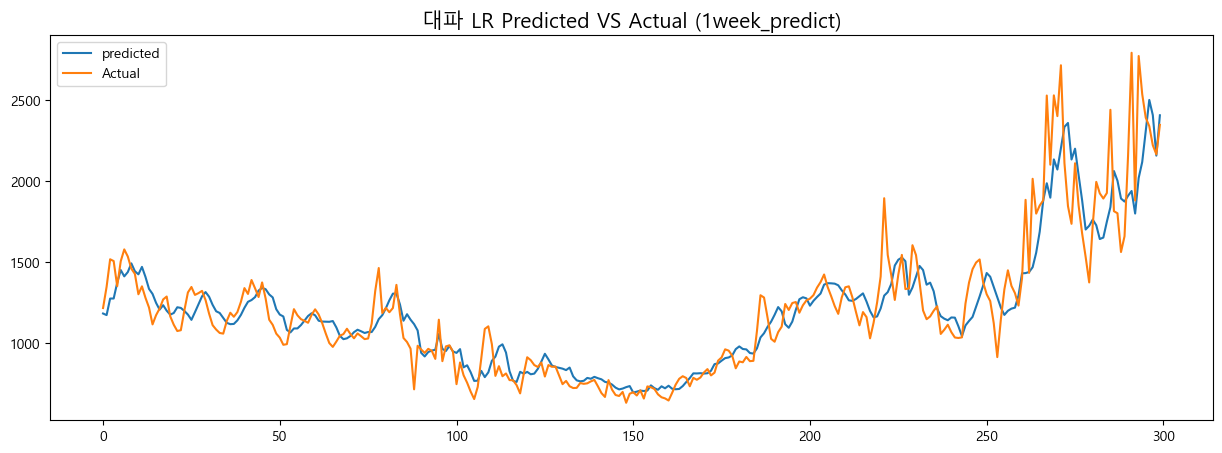

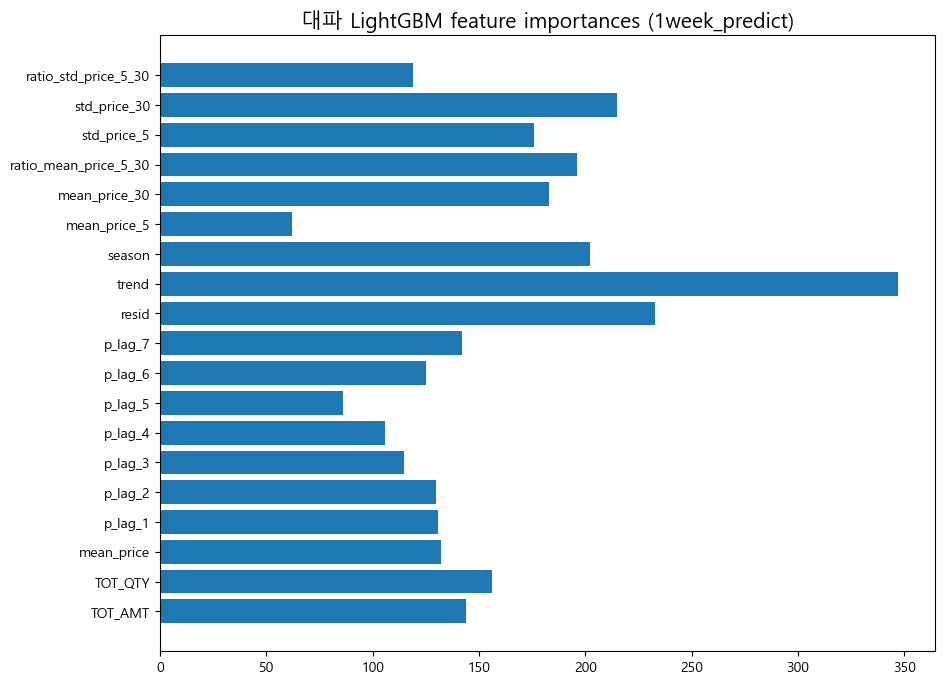

(1130, 19) (1130,) (296, 19) (296,)
마늘
(296,) (296,)
마늘 default LR model MAPE : 0.04555703237455908
(296,) (296,)
마늘 default LGBM model MAPE : 0.07135172128697394


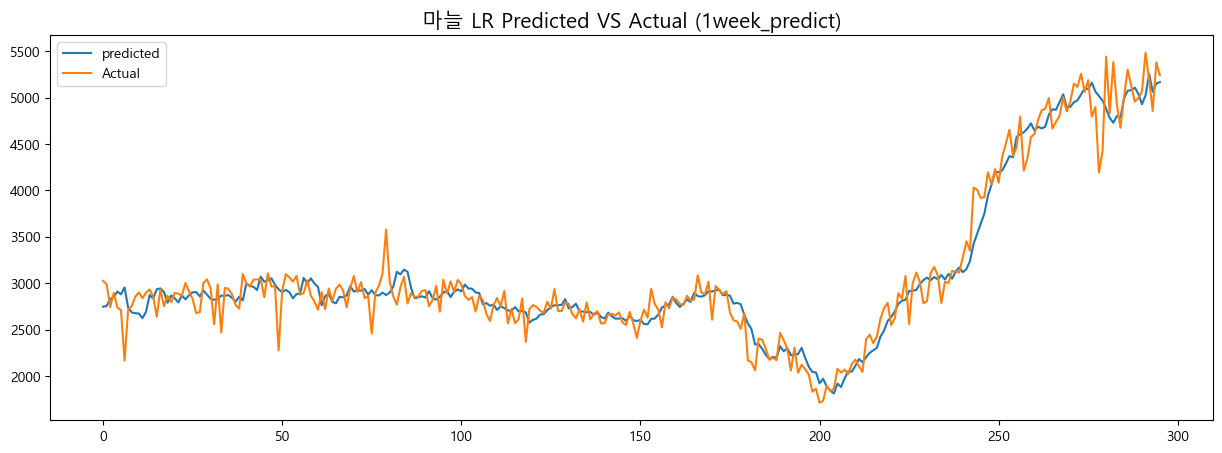

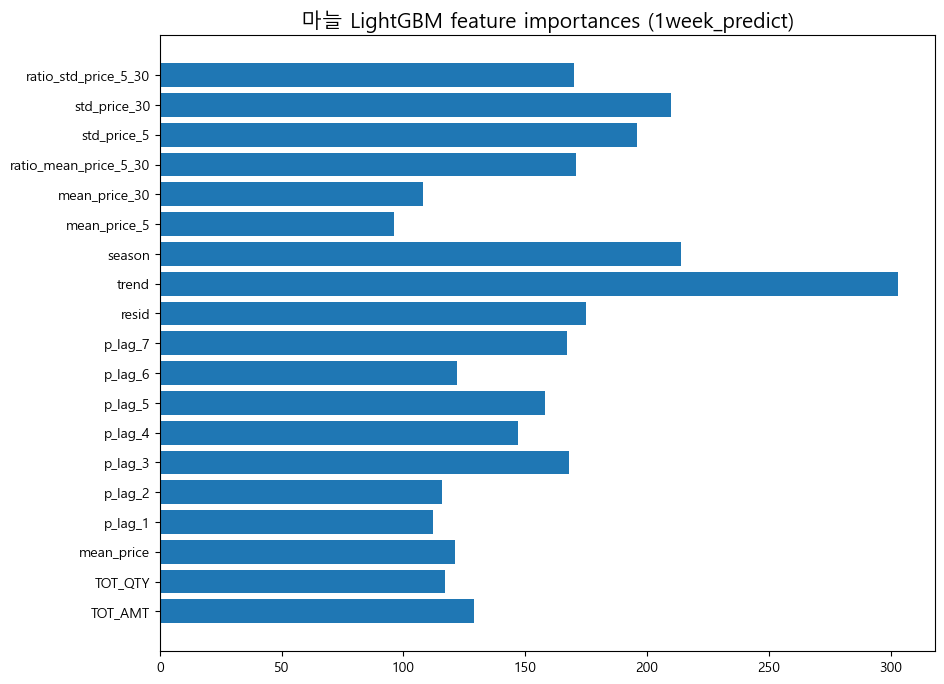

(1121, 19) (1121,) (295, 19) (295,)
건고추
(295,) (295,)
건고추 default LR model MAPE : 0.1712424134756548
(295,) (295,)
건고추 default LGBM model MAPE : 0.20717970496461857


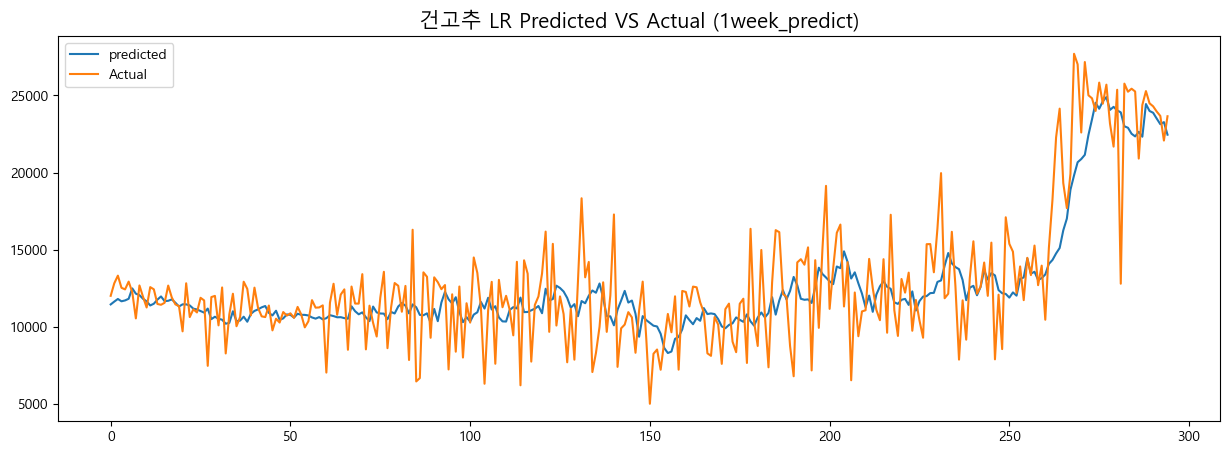

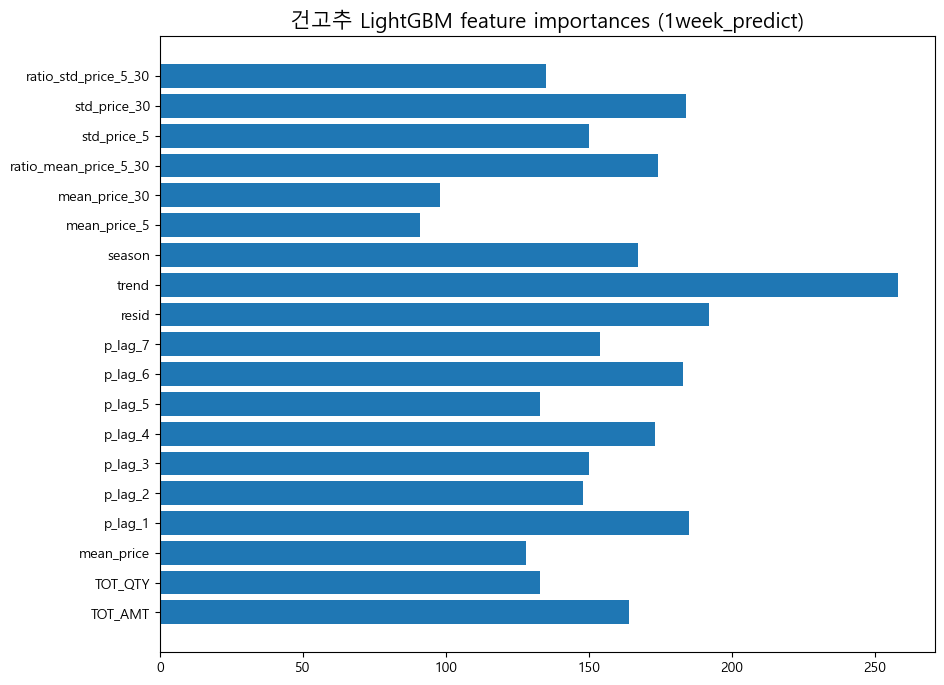

In [5]:
for pum in df.PUM_NM.unique() :
    train_X, test_X, train_y, test_y = pre_2(df, pum, 7)
    print(f'{pum}')
    

    # 2주 예측은 LR 모델로 진행
    model = LinearRegression()
    lr_model = model.fit(train_X, train_y)
    lr_pred = lr_model.predict(test_X)
    mape = MAPE(test_y, lr_pred)
    print(lr_pred.shape, test_y.shape)
    print(f'{pum} default LR model MAPE :', mape)


    # feature importances 그래프를 위해 lightGBM 모델 사용
    model2 = LGBMRegressor()
    lgb_model = model2.fit(train_X, train_y)
    lgb_pred = lgb_model.predict(test_X)
    mape2 = MAPE(test_y, lgb_pred)
    print(lgb_pred.shape, test_y.shape)
    print(f'{pum} default LGBM model MAPE :', mape2)

    # 실제값 예측값 시각화(LR 모델이 잘나와서 LR 모델로 예측한 값 시각화)
    plt.figure(figsize = (15,5))
    plt.plot(lr_pred, label = 'predicted')
    plt.plot(np.array(test_y), label = 'Actual')
    plt.legend()
    plt.title(f'{pum} LR Predicted VS Actual (1week_predict)', fontsize = 15)
    plt.show()

    # LightGBM feature importances 시각화
    plt.figure(figsize = (10,8))
    plt.barh(train_X.columns, lgb_model.feature_importances_)
    plt.title(f'{pum} LightGBM feature importances (1week_predict)', fontsize = 15)
    plt.show()